# БИБЛИОТЕКА PANDAS (from SBER)

# 1 Data Structures

In [81]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 5)

## Создание

### из списка

создаем Series значений из списка целых чисел

In [2]:
s = pd.Series(data=[10, 11, 12, 13, 14],
              index=[1, 2, 3, 5, 7])
s

1    10
2    11
3    12
5    13
7    14
dtype: int64

создаем Series из строковых значений

In [82]:
l = ['Blue', 'Yellow', 'Green']
s = pd.Series(l)
s

0      Blue
1    Yellow
2     Green
dtype: object

создаем Series из 5 элементов, каждый элемент - list python

In [5]:
l = [[1, 2]]
s = pd.Series(l*5)
s

0    [1, 2]
1    [1, 2]
2    [1, 2]
3    [1, 2]
4    [1, 2]
dtype: object

создаем DataFrame из двумерного списка

In [83]:
l = [[10, 11], [20, 21], [30, 31]]
df = pd.DataFrame(l)
df

,0,1
0,10,11
1,20,21
2,30,31


задаем имена столбцов

In [85]:
df = pd.DataFrame([[10, 11], [20, 21], [30, 31]],
                  columns=['A', 'B'])
df

,A,B
0,10,11
1,20,21
2,30,31


In [87]:
l = [[10, 11], [20, 21], [30, 31]]
names = ['A', 'B']

df = pd.DataFrame(l,columns=names)
df

,A,B
0,10,11
1,20,21
2,30,31


создаем DataFrame для списка объектов Series

In [8]:
series_1 = pd.Series([70, 90])
series_2 = pd.Series([71, 91])
df = pd.DataFrame([series_1, series_2])
df

,0,1
0,70,90
1,71,91


задаем имена столбцов после создания датафрейма

In [9]:
df.columns = ['col_1', 'col_2']
df

,col_1,col_2
0,70,90
1,71,91


### из словаря 

создаем объект Series из словаря, при этом посмотрим, как изменились индексы

In [10]:
s = pd.Series({'Homer': 'Dad',
               'Marge': 'Mom',
               'Bart': 'Son',
               'Lisa': 'Daughter',
               'Maggie': 'Daughter'})
s

Homer          Dad
Marge          Mom
Bart           Son
Lisa      Daughter
Maggie    Daughter
dtype: object

создание DataFrame с помощью питоновского словаря

In [12]:
list_1 = [70, 71]
list_2 = [90, 91]
temperatures = {'col_1': list_1,
                'col_2': list_2}
pd.DataFrame(temperatures)

,col_1,col_2
0,70,90
1,71,91


создание DataFrame с помощью словаря, состоящего из объектов Series

In [13]:
series_1 = pd.Series([70, 71])
series_2 = pd.Series([90, 91])

df = pd.DataFrame({'col_1': series_1,
                   'col_2': series_2})
df

,col_1,col_2
0,70,90
1,71,91


### при помощи функций

#### `np.arange`

создание Series, используя `np.arange` - последовательность чисел от **start** до **stop-1** с шагом **step**:
```python 
np.arange(start, stop, step) 
```
[documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [218]:
s = pd.Series(np.arange(15,25,2))
s

0    15
1    17
2    19
3    21
4    23
dtype: int32

In [88]:
s = pd.Series(range(15,25,2))
s

0    15
1    17
2    19
3    21
4    23
dtype: int64

#### `np.linspace`
создаем Series из 5 значений, равномерно разбивающих отрезок 0 до 9 с использованием `np.linspace`

In [42]:
s = pd.Series(np.linspace(0, 9, 5))
s

0    0.00
1    2.25
2    4.50
3    6.75
4    9.00
dtype: float64

#### `np.random`

Генерация случайных чисел.

Зафикисруем значение `seed` ([info](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python?noredirect=1&lq=1https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python?noredirect=1&lq=1)), что позволит нам в будущем воcпроизводить свои результаты

Создадим объект Series из 5 нормально распределенных случайных чисел `np.random`

In [50]:
np.random.seed(123)
s = pd.Series(np.random.normal(size=5))
s

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
dtype: float64

Создадим объект DataFrame размерности 4х3 из случайных чисел

In [93]:
np.random.seed(123)
df = pd.DataFrame(np.random.normal(size=12).reshape(4, 3),
                  index=['ind_1', 'ind_2', 'ind_3', 'ind_4'],
                  columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
ind_1,-1.085631,0.997345,0.282978
ind_2,-1.506295,-0.578600,1.651437
ind_3,-2.426679,-0.428913,1.265936
ind_4,-0.866740,-0.678886,-0.094709


In [108]:
np.random.seed(123)
df = pd.DataFrame(np.random.normal(size=(4, 3)),
                  index=['ind_1', 'ind_2', 'ind_3', 'ind_4'],
                  columns=['col_1', 'col_2', 'col_3'])
df

,col_1,col_2,col_3
ind_1,-1.085631,0.997345,0.282978
ind_2,-1.506295,-0.578600,1.651437
ind_3,-2.426679,-0.428913,1.265936
ind_4,-0.866740,-0.678886,-0.094709


### [из файла](http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-tools-text-csv-hdf5)

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [22]:
pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
            sep = ';')

,"Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings"
0,"MMM,3M Co.,Industrials,141.14,2.12,20.33,6.90,..."
1,"ABT,Abbott Laboratories,Health Care,39.60,1.82..."
2,"ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,..."
3,"ACN,Accenture,Information Technology,79.79,2.3..."
4,"ACE,ACE Limited,Financials,102.91,2.21,10.00,1..."
...,...
495,"YHOO,Yahoo Inc.,Information Technology,35.02,,..."
496,"YUM,Yum! Brands Inc,Consumer Discretionary,74...."
497,"ZMH,Zimmer Holdings,Health Care,101.84,0.81,22..."
498,"ZION,Zions Bancorp,Financials,28.43,0.56,18.82..."


разделитель

In [52]:
pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
           sep = ',')

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.121,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.359,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,ZION,Zions Bancorp,Financials,28.43,0.56,18.82,1.511,30.191,26.39,33.33,5.257,0.000,2.49,0.94,http://www.sec.gov/cgi-bin/browse-edgar?action...
499,ZTS,Zoetis Inc,Health Care,30.53,0.90,29.22,1.038,2.150,28.14,34.28,15.296,1.292,3.33,14.11,http://www.sec.gov/cgi-bin/browse-edgar?action...


количество строк

In [24]:
pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
           sep = ',',
           nrows = 3)

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.121,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.359,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,2.570,2.954,40.10,54.78,85.784,7.190,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...


столбцы

In [25]:
pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
           sep = ',',
           nrows = 3,
           usecols=['Symbol', 'Sector', 'Price', 'Book Value'])

,Symbol,Sector,Price,Book Value
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954


индекс

In [26]:
pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
           sep = ',',
           nrows = 3,
           usecols=['Symbol', 'Sector', 'Price', 'Book Value'],
           index_col='Symbol')

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


итератор, see: [How do I read a large csv file with pandas?How do I read a large csv file with pandas?](https://stackoverflow.com/questions/25962114/how-do-i-read-a-large-csv-file-with-pandashttps://stackoverflow.com/questions/25962114/how-do-i-read-a-large-csv-file-with-pandas)

In [54]:
df_chunk = pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
                       sep = ',',
                       chunksize=50,
                       usecols=['Symbol', 'Sector', 'Price', 'Book Value'],
                       index_col='Symbol')

In [31]:
for df_tmp in df_chunk:
    print('DataFrame part:', df_tmp.shape)

DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)
DataFrame part: (50, 3)


In [41]:
sp500 = pd.read_csv(filepath_or_buffer = "../data/sp500.csv",
                    sep = ',',
                    usecols=['Symbol', 'Sector', 'Price', 'Book Value'],
                    index_col='Symbol')
# pd.set_option('display.max_rows', 5)
sp500

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
...,...,...,...
ZION,Financials,28.43,30.191
ZTS,Health Care,30.53,2.150


## Свойства

### создаем Series для примеров

In [5]:
Simpsons = pd.Series({'Homer': 120,
                      'Marge': 60,
                      'Bart': 35,
                      'Lisa': 30,
                      'Maggie': 7})

Simpsons

Homer     120
Marge      60
Bart       35
Lisa       30
Maggie      7
dtype: int64

In [56]:
np.random.seed(123)
numbers = pd.Series(data = np.random.normal(size=10),
                    index = np.arange(25,35))
numbers

25   -1.085631
26    0.997345
        ...   
33    1.265936
34   -0.866740
Length: 10, dtype: float64

### тип данных

In [60]:
Simpsons.dtype

dtype('int64')

In [58]:
sp500.dtypes

Sector         object
Price         float64
Book Value    float64
dtype: object

### количество элементов

Series:

In [61]:
print('Первый способ:', len(Simpsons))
print('Второй способ:', Simpsons.size)
print('Третий способ:', Simpsons.shape)

Первый способ: 5
Второй способ: 5
Третий способ: (5,)


DataFrame:

In [62]:
print('Первый способ:', len(sp500))
print('Второй способ:', sp500.size)
print('Третий способ:', sp500.shape)

Первый способ: 500
Второй способ: 1500
Третий способ: (500, 3)


### количество уникальных элементов

In [63]:
Simpsons.nunique()

5

In [64]:
sp500.nunique()

Sector         13
Price         495
Book Value    495
dtype: int64

### индекс и значения

Series:

In [65]:
Simpsons.index

Index(['Homer', 'Marge', 'Bart', 'Lisa', 'Maggie'], dtype='object')

In [9]:
Simpsons.index[0]

'Homer'

In [66]:
Simpsons.values

array([120,  60,  35,  30,   7], dtype=int64)

In [13]:
Simpsons.values[0]

120

DataFrame:

In [67]:
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [68]:
sp500.values

array([['Industrials', 141.14, 26.668],
       ['Health Care', 39.6, 15.573],
       ['Health Care', 53.95, 2.954],
       ...,
       ['Health Care', 101.84, 37.181],
       ['Financials', 28.43, 30.191],
       ['Health Care', 30.53, 2.15]], dtype=object)

In [69]:
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

### присвоение / изменение имени

####  объекта Series

In [70]:
Simpsons.name = 'Simpsons weight'
Simpsons

Homer     120
Marge      60
Bart       35
Lisa       30
Maggie      7
Name: Simpsons weight, dtype: int64

#### индекса

In [72]:
Simpsons.index.name = 'First name'
Simpsons

First name
Homer     120
Marge      60
Bart       35
Lisa       30
Maggie      7
Name: Simpsons weight, dtype: int64

#### столбца

In [74]:
sp500_copy = sp500.rename(columns = {'Book Value': 'BookValue'})
sp500_copy

,Sector,Price,BookValue
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
...,...,...,...
ZION,Financials,28.43,30.191
ZTS,Health Care,30.53,2.150


проверяем, не изменились ли имена столбцов в исходном датафрейме

In [75]:
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

In [76]:
sp500_copy.columns

Index(['Sector', 'Price', 'BookValue'], dtype='object')

этот программный код переименовывает столбец на месте

In [77]:
sp500_copy.rename(columns = {'Book Value': 'BookValue'},
            inplace=True)

смотрим изменилось ли имя столбца

In [78]:
sp500_copy.columns

Index(['Sector', 'Price', 'BookValue'], dtype='object')

## Вывод значений

### первые / последние строки

In [79]:
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [80]:
Simpsons.tail(3)

First name
Bart      35
Lisa      30
Maggie     7
Name: Simpsons weight, dtype: int64

### столбцы 

извлекаем столбец Sector

In [81]:
sp500['Sector'].head()

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
Name: Sector, dtype: object

тип столбца датафрейма:

In [82]:
type(sp500['Sector'])

pandas.core.series.Series

извлекаем столбцы Price и Book Value

In [83]:
sp500[['Price', 'Book Value']].head()

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897


покажем, что результат является объектом DataFrame

In [84]:
type(sp500[['Price', 'Book Value']])

pandas.core.frame.DataFrame

атрибутивный доступ к столбцу по имени

In [85]:
sp500.Price.head()

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
Name: Price, dtype: float64

пример с названием "Book Value"

In [86]:
sp500.Book Value

SyntaxError: invalid syntax (1239945967.py, line 1)

### строки

#### по метке 

**Series**

In [87]:
numbers.loc[[25,33]]

25   -1.085631
33    1.265936
dtype: float64

ошибка - нет метки

In [88]:
numbers.loc[0]

KeyError: 0

**DataFrame**

получаем строку с меткой индекса MMM,которая возвращается в виде объекта Series

In [89]:
sp500.loc['MMM']

Sector        Industrials
Price              141.14
Book Value         26.668
Name: MMM, dtype: object

In [90]:
type(sp500.loc['MMM'])

pandas.core.series.Series

получаем строки MMM и MSFT результатом будет объект DataFrame

In [91]:
sp500.loc[['MMM', 'MSFT']]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
MSFT,Information Technology,40.12,10.584


In [92]:
type(sp500.loc[['MMM', 'MSFT']])

pandas.core.frame.DataFrame

#### по позиции

**Series** 

In [93]:
numbers

25   -1.085631
26    0.997345
        ...   
33    1.265936
34   -0.866740
Length: 10, dtype: float64

по позиции

In [94]:
numbers.iloc[[5,-5]]

30    1.651437
30    1.651437
dtype: float64

ошибка:

In [95]:
numbers.iloc[10]

IndexError: single positional indexer is out-of-bounds

**DataFrame**

получаем строки, имеющие позиции 0 и 2

In [96]:
sp500.iloc[[0, 2]]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABBV,Health Care,53.95,2.954


получаем позиции меток MMM и A в индексе

In [97]:
i1 = sp500.index.get_loc('MMM')
i2 = sp500.index.get_loc('A')
(i1, i2)

(0, 10)

и извлекаем строки

In [98]:
sp500.iloc[[i1, i2]]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
A,Health Care,56.18,16.928


### поиск скалярного значения

ищем скалярное значение по метке строки и метке (имени) столбца

In [99]:
sp500.at['MMM', 'Price']

141.14

ищем скалярное значение по позиции строки и позиции столбца; извлекаем значение в строке 0, столбце 1

In [100]:
sp500.iat[0, 1]

141.14

### одновременный отбор строк и столбцов

отбираем строки с метками индекса ABT и ZTS для столбцов Sector и Price

In [101]:
sp500.loc[['ABT', 'ZTS']][['Sector', 'Price']]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


In [102]:
sp500.loc[['ABT', 'ZTS'],['Sector', 'Price']]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


определение номера позиций заданных меток

In [103]:
print(sp500.index.get_loc('ABT'),sp500.index.get_loc('ZTS')) 

1 499


отбор строк и столбцов по номеру позиций

In [104]:
sp500.iloc[[1,499],[0,1]]

,Sector,Price
Symbol,,
ABT,Health Care,39.60
ZTS,Health Care,30.53


### транспонирование

In [105]:
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [106]:
sp500.T.head()

Symbol,MMM,ABT,ABBV,ACN,ACE,ACT,ADBE,AES,AET,AFL,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZMH,ZION,ZTS
Sector,Industrials,Health Care,Health Care,Information Technology,Financials,Health Care,Information Technology,Utilities,Health Care,Financials,...,Utilities,Information Technology,Information Technology,Financials,Industrials,Information Technology,Consumer Discretionary,Health Care,Financials,Health Care
Price,141.14,39.6,53.95,79.79,102.91,213.77,64.3,13.61,76.39,61.31,...,30.24,12.06,46.03,32.47,38.42,35.02,74.77,101.84,28.43,30.53
Book Value,26.668,15.573,2.954,8.326,86.897,55.188,13.262,5.781,40.021,34.527,...,19.45,10.471,10.247,37.451,12.127,12.768,5.147,37.181,30.191,2.15


### переиндексация

ошибка:

In [107]:
sp500.loc[['MMM', 'ABBV', 'NEW VALUE']]

KeyError: "['NEW VALUE'] not in index"

делаем переиндексацию, задав метки MMM, ABBV и NEW VALUE

In [108]:
reindexed = sp500.reindex(index=['MMM', 'ABBV', 'NEW VALUE'])

обратите внимание, что все индексы, кромя перечисленных при вызове, удалены, а *NEW VALUE* содержит значения *NaN*

In [109]:
reindexed

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABBV,Health Care,53.95,2.954
NEW VALUE,NaN,NaN,NaN


выполняем переиндексацию столбцов

In [110]:
sp500.reindex(columns=['Price', 'Book Value', 'NewCol']).head()

,Price,Book Value,NewCol
Symbol,,,
MMM,141.14,26.668,NaN
ABT,39.60,15.573,NaN
ABBV,53.95,2.954,NaN
ACN,79.79,8.326,NaN
ACE,102.91,86.897,NaN


при этом можем заполнить отсутствующие значения константами вместо *NaN*

In [111]:
sp500.reindex(columns=['Price',
                       'Book Value',
                       'NewCol'],
              fill_value=0).head()

,Price,Book Value,NewCol
Symbol,,,
MMM,141.14,26.668,0
ABT,39.60,15.573,0
ABBV,53.95,2.954,0
ACN,79.79,8.326,0
ACE,102.91,86.897,0


### случайная подвыборка

отбираем три случайные строки

In [112]:
sp500.sample(n=3)

,Sector,Price,Book Value
Symbol,,,
ZION,Financials,28.43,30.191
NOV,Energy,81.90,52.925
STX,Information Technology,51.95,8.080


случайный отбор с возвращением

In [113]:
sp500.sample(frac=5, replace=True, random_state=777)

,Sector,Price,Book Value
Symbol,,,
CLF,Materials,16.34,34.523
MHK,Consumer Discretionary,136.41,61.582
...,...,...,...
CI,Health Care,89.24,39.304
MCO,Financials,82.50,1.803


### [настройки вывода](http://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

In [124]:
print(pd.options.display.max_rows)
print('I changed the number, see the top of the doc. Default is 60')

5
I changed the number, see the top of the doc. Default is 60


In [125]:
sp500

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
...,...,...,...
ZION,Financials,28.43,30.191
ZTS,Health Care,30.53,2.150


In [126]:
pd.options.display.max_rows = 10

In [127]:
sp500

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
...,...,...,...
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147
ZMH,Health Care,101.84,37.181


In [128]:
pd.options.display.max_rows

10

## Срезы данных

### Series

Задаём срез по правилу: [начальная позиция: конечная позиция: величина шага], при этом:
- Правая граница - не включается
- Шаг может быть отрицательным
- Позиция также может быть отрицательной - тогда отсчёт происходит "с другого конца"
- Нумерация происходит от нуля

In [129]:
numbers

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

срез, содержащий элементы с позициями от 1 по 5

In [130]:
numbers.iloc[1:6]

26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
dtype: float64

выбираем элементы в позициях 1, 3, 5 == выбираем элементы с 1 по 5 позицию с шагом 2

In [131]:
numbers.iloc[1:6:2]

26    0.997345
28   -1.506295
30    1.651437
dtype: float64

можем оставить только конечную позицию

In [132]:
numbers.iloc[:6]

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
dtype: float64

либо оставим только начальную позицию

In [133]:
numbers.iloc[3:]

28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

отбираем элементы Series в обратном порядке, начиная с 5

In [134]:
numbers.iloc[5::-1]

30    1.651437
29   -0.578600
28   -1.506295
27    0.282978
26    0.997345
25   -1.085631
dtype: float64

отбор 4 последних строк

In [135]:
numbers.iloc[-4:]

31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

### DataFrame

In [136]:
sp500.iloc[:5]

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


в обратном порядке

In [137]:
sp500.iloc[4::-1]

,Sector,Price,Book Value
Symbol,,,
ACE,Financials,102.91,86.897
ACN,Information Technology,79.79,8.326
ABBV,Health Care,53.95,2.954
ABT,Health Care,39.60,15.573
MMM,Industrials,141.14,26.668


строки, начиная с метки ABT и заканчивая меткой ACN

In [138]:
sp500.loc['ABT':'ACN']

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326


## Копирование и ссылки

In [139]:
numbers

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

элементы с 1 по 4

In [140]:
numbers.iloc[[1,2,3,4]]

26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
dtype: float64

сохранили в переменную n

In [141]:
n = numbers.iloc[[1,2,3,4]]

In [142]:
n

26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
dtype: float64

присваиваем значение 0 всем элементам

In [143]:
n.loc[:] = 0
n

26    0.0
27    0.0
28    0.0
29    0.0
dtype: float64

что-нибудь произошло с numbers?

In [144]:
numbers

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

еще раз сохраним первые 4 элемента

In [145]:
n = numbers.iloc[[1,2,3,4]]
n

26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
dtype: float64

создаем переменную k = срез с 1 по 4 элемент

In [147]:
k = numbers.iloc[1:5]
k.loc[:] = 0
k

26    0.0
27    0.0
28    0.0
29    0.0
dtype: float64

In [151]:
n == k

26    True
27    True
28    True
29    True
dtype: bool

In [148]:
numbers

25   -1.085631
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

воcстановили numbers

In [150]:
numbers.iloc[1:5] = n
numbers

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

##  Удаление 

### del

Series

In [153]:
Simpsons

First name
Homer     120
Marge      60
Bart       35
Lisa       30
Maggie      7
Name: Simpsons weight, dtype: int64

In [154]:
Simpsons_copy = Simpsons.copy()
del Simpsons_copy['Maggie']
Simpsons_copy

First name
Homer    120
Marge     60
Bart      35
Lisa      30
Name: Simpsons weight, dtype: int64

DataFrame

In [155]:
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [156]:
sp500_copy = sp500.copy()
del sp500_copy['Price']
sp500_copy.iloc[:2]

,Sector,Book Value
Symbol,,
MMM,Industrials,26.668
ABT,Health Care,15.573


### pop 

In [157]:
sp500_copy = sp500.copy()

In [158]:
sp500_copy.head(3)

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


эта строка удалит столбец Sector и возвратит его как серию

In [159]:
popped_column = sp500_copy.pop('Sector')

столбец Sector удален на месте

In [160]:
sp500_copy.head(3)

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954


и у нас есть столбец Sector, полученный в результате применения pop

In [161]:
popped_column.head(3)

Symbol
MMM     Industrials
ABT     Health Care
ABBV    Health Care
Name: Sector, dtype: object

Для Series применение .pop идентично

### drop 

In [162]:
sp500_copy = sp500.copy()

In [163]:
sp500_copy.head(3)

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


- эта строка вернет новый датафрейм с удаленным столбцом 'Sector’
- копия датафрейма не изменится

In [164]:
sp500_copy_after_drop = sp500_copy.drop(['Sector'], axis = 1)
sp500_copy_after_drop.head(3)

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ABT,39.60,15.573
ABBV,53.95,2.954


In [165]:
sp500_copy.head(3)

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


получаем копию первых 5 строк датафрейма data

In [170]:
sp500_part_copy = sp500.iloc[:5].copy()
sp500_part_copy

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


удаляем строки с метками ABT и ACN

In [171]:
sp500_part_copy = sp500_part_copy.drop(['ABT', 'ACN'], axis=0)
sp500_part_copy.head(5)

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABBV,Health Care,53.95,2.954
ACE,Financials,102.91,86.897


Для Series применение .drop идентично

## Фильтрация по условию

### Series 

In [172]:
numbers

25   -1.085631
26    0.997345
27    0.282978
28   -1.506295
29   -0.578600
30    1.651437
31   -2.426679
32   -0.428913
33    1.265936
34   -0.866740
dtype: float64

какие строки имеют значения больше 0 и меньше 1?

In [173]:
logical_results = (numbers > 0) & (numbers < 1)
logical_results

25    False
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

Скобки!!! Следующий программный код приведет к выдаче исключения
```python
numbers > 0 & numbers < 1 
```

тип полученного результата - Series, который можно использовать для отбора интерсующих нас значений

In [174]:
type(logical_results)

pandas.core.series.Series

отбираем строки со значением True

In [175]:
numbers[logical_results]

26    0.997345
27    0.282978
dtype: float64

использование метода .where

In [176]:
numbers.where((numbers > 0) & (numbers < 1))

25         NaN
26    0.997345
27    0.282978
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
dtype: float64

In [179]:
numbers.where((numbers > 0) & (numbers < 1), other = 'Get off')

25     Get off
26    0.997345
27    0.282978
28     Get off
29     Get off
30     Get off
31     Get off
32     Get off
33     Get off
34     Get off
dtype: object

все ли элементы >= 0?

In [180]:
(numbers >= 0).all()

False

есть ли элемент < 2?

In [181]:
(numbers < 2).any()

True

сколько значений < 1?

In [182]:
numbers < 1

25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33    False
34     True
dtype: bool

In [183]:
(numbers < 1).sum()

8

### DataFrame

какие строки имеют значения Price < 100?

In [184]:
sp500.Price < 100

Symbol
MMM     False
ABT      True
ABBV     True
ACN      True
ACE     False
        ...  
YHOO     True
YUM      True
ZMH     False
ZION     True
ZTS      True
Name: Price, Length: 500, dtype: bool

теперь получим строки, в которых Price < 100

In [185]:
sp500[sp500.Price < 100]

,Sector,Price,Book Value
Symbol,,,
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ADBE,Information Technology,64.30,13.262
AES,Utilities,13.61,5.781
...,...,...,...
XYL,Industrials,38.42,12.127
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147


извлекаем лишь те строки, в которых значение Price < 10 и > 6

In [186]:
r = sp500[(sp500['Price'] < 10) & 
          (sp500.Price > 6)] ['Price']
r

Symbol
HCBK    9.80
HBAN    9.10
SLM     8.82
WIN     9.38
Name: Price, dtype: float64

извлекаем строки, в которых переменная Sector принимает значение Health Care, а переменная Price больше или равна 100.00

In [187]:
r = sp500[(sp500.Sector == 'Health Care') & 
          (sp500.Price >= 100.00)] [['Price', 'Sector']]
r

,Price,Sector
Symbol,,
ACT,213.77,Health Care
ALXN,162.30,Health Care
AGN,166.92,Health Care
AMGN,114.33,Health Care
BCR,146.62,Health Care
...,...,...
REGN,297.77,Health Care
TMO,115.74,Health Care
WAT,100.54,Health Care


использование метода .isin

In [188]:
s_tmp = sp500.Sector.isin(['Information Technology', 'Financials'])
s_tmp

Symbol
MMM     False
ABT     False
ABBV    False
ACN      True
ACE      True
        ...  
YHOO     True
YUM     False
ZMH     False
ZION     True
ZTS     False
Name: Sector, Length: 500, dtype: bool

In [189]:
sp500[s_tmp].head()

,Sector,Price,Book Value
Symbol,,,
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
ADBE,Information Technology,64.30,13.262
AFL,Financials,61.31,34.527
AKAM,Information Technology,53.65,15.193


использование метода .query

In [190]:
r = sp500[(sp500.Sector == 'Health Care') & 
          (sp500.Price >= 100.00)] [['Price', 'Sector']]
r

,Price,Sector
Symbol,,
ACT,213.77,Health Care
ALXN,162.30,Health Care
AGN,166.92,Health Care
AMGN,114.33,Health Care
BCR,146.62,Health Care
...,...,...
REGN,297.77,Health Care
TMO,115.74,Health Care
WAT,100.54,Health Care


In [191]:
q = sp500.query("Sector=='Health Care' & Price >= 100")[['Price', 'Sector']]
q

,Price,Sector
Symbol,,
ACT,213.77,Health Care
ALXN,162.30,Health Care
AGN,166.92,Health Care
AMGN,114.33,Health Care
BCR,146.62,Health Care
...,...,...
REGN,297.77,Health Care
TMO,115.74,Health Care
WAT,100.54,Health Care


## Добавление 

### оператор [ ] 

создаем копию, чтобы исходные данные остались в неизменном виде

In [192]:
sp500_copy = sp500.copy()

добавляем столбец

In [193]:
sp500_copy['RoundedPrice'] = sp500_copy.Price.round()
sp500_copy.head(3)

,Sector,Price,Book Value,RoundedPrice
Symbol,,,,
MMM,Industrials,141.14,26.668,141.0
ABT,Health Care,39.60,15.573,40.0
ABBV,Health Care,53.95,2.954,54.0


### метод .insert()

создаем копию, чтобы исходные данные остались в неизменном виде

In [194]:
sp500_copy = sp500.copy()

вставляем столбец RoundedPrice в качестве третьего столбца датафрейма

In [195]:
sp500_copy.insert(1, 'RoundedPrice', sp500_copy.Price.round())
sp500_copy.head(3)

,Sector,RoundedPrice,Price,Book Value
Symbol,,,,
MMM,Industrials,141.0,141.14,26.668
ABT,Health Care,40.0,39.60,15.573
ABBV,Health Care,54.0,53.95,2.954


### метод .assign() 

создаем копию, чтобы исходные данные остались в неизменном виде

In [196]:
sp500_copy = sp500.copy()

одновременное добавление двух столбцов:

In [197]:
sp500_copy.assign(Rounded_Price=sp500_copy.Price.round(),
                  R_BookValue_Price=lambda x: (x['Book Value'] / x['Rounded_Price']))

,Sector,Price,Book Value,Rounded_Price,R_BookValue_Price
Symbol,,,,,
MMM,Industrials,141.14,26.668,141.0,0.189135
ABT,Health Care,39.60,15.573,40.0,0.389325
ABBV,Health Care,53.95,2.954,54.0,0.054704
ACN,Information Technology,79.79,8.326,80.0,0.104075
ACE,Financials,102.91,86.897,103.0,0.843660
...,...,...,...,...,...
YHOO,Information Technology,35.02,12.768,35.0,0.364800
YUM,Consumer Discretionary,74.77,5.147,75.0,0.068627
ZMH,Health Care,101.84,37.181,102.0,0.364520


## Выравнивание данных

### Series 

первая серия для примеров

In [198]:
s_1 = pd.Series(data=[77,33,11],index=['a','b','f'])
s_1

a    77
b    33
f    11
dtype: int64

вторая серия для примеров

In [199]:
s_2 = pd.Series(data=[11,5,6],index=['c','b','a'])
s_2

c    11
b     5
a     6
dtype: int64

для непересекающейся части индексов будут получены значения NaN

In [200]:
s_1+s_2

a    83.0
b    38.0
c     NaN
f     NaN
dtype: float64

метки не обязательно должны быть уникальными

In [201]:
s_1 = pd.Series(data=[77, 33, 15, 3], index=['a', 'a', 'a', 'd'])
s_1

a    77
a    33
a    15
d     3
dtype: int64

In [202]:
s_2 = pd.Series(data=[11, 5, 6], index=['c', 'a', 'a'])
s_2

c    11
a     5
a     6
dtype: int64

3 метки 'а' и 2 метки 'а', результат 6 меток а ("Каждый с каждым и сложить")

In [204]:
s_2+s_1

a    82.0
a    38.0
a    20.0
a    83.0
a    39.0
a    21.0
c     NaN
d     NaN
dtype: float64

### DataFrame

In [205]:
sp500_part_1 = sp500.iloc[0:5, 0:2].copy()
sp500_part_2 = sp500.iloc[2:7, 1:3].copy()

In [206]:
sp500_part_1

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ABT,Health Care,39.60
ABBV,Health Care,53.95
ACN,Information Technology,79.79
ACE,Financials,102.91


In [207]:
sp500_part_2

,Price,Book Value
Symbol,,
ABBV,53.95,2.954
ACN,79.79,8.326
ACE,102.91,86.897
ACT,213.77,55.188
ADBE,64.30,13.262


In [208]:
sp500_part_1 + sp500_part_2

,Book Value,Price,Sector
Symbol,,,
ABBV,NaN,107.90,NaN
ABT,NaN,NaN,NaN
ACE,NaN,205.82,NaN
ACN,NaN,159.58,NaN
ACT,NaN,NaN,NaN
ADBE,NaN,NaN,NaN
MMM,NaN,NaN,NaN


происходит выравнивание при создании датафрейма

In [209]:
series_1 = pd.Series([70, 90])
series_2 = pd.Series([71, 91])
series_3 = pd.Series([85, 87], index=[1, 2])
df = pd.DataFrame({'col_1': series_1,
                   'col_2': series_2,
                   'col_3': series_3})
df

,col_1,col_2,col_3
0,70.0,71.0,NaN
1,90.0,91.0,85.0
2,NaN,NaN,87.0


## Сортировка

### по индексу 

In [210]:
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [211]:
sp500.sort_index().head()

,Sector,Price,Book Value
Symbol,,,
A,Health Care,56.18,16.928
AA,Materials,13.52,9.670
AAPL,Information Technology,614.13,139.460
ABBV,Health Care,53.95,2.954
ABC,Health Care,71.64,9.430


`axis=1` is columns

In [213]:
sp500.sort_index(axis=1).head()

,Book Value,Price,Sector
Symbol,,,
MMM,26.668,141.14,Industrials
ABT,15.573,39.60,Health Care
ABBV,2.954,53.95,Health Care
ACN,8.326,79.79,Information Technology
ACE,86.897,102.91,Financials


### по значению

In [214]:
sp500.sort_values(by='Price').head()

,Sector,Price,Book Value
Symbol,,,
BEAM,Consumer Discretionary,0.00,NaN
FTR,Telecommunications Services,5.81,3.989
SLM,Financials,8.82,11.895
HBAN,Financials,9.10,6.995
WIN,Telecommunications Services,9.38,1.199


In [215]:
sp500.sort_values(by='Price', ascending=False).head()

,Sector,Price,Book Value
Symbol,,,
PCLN,Industrials,1197.12,137.886
GHC,Consumer Discretionary,677.29,0.000
AAPL,Information Technology,614.13,139.460
GOOG,Information Technology,552.70,135.977
AZO,Consumer Discretionary,540.90,-51.275


### наименьшее / наибольшее значение

In [216]:
sp500.nsmallest(5, 'Price')

,Sector,Price,Book Value
Symbol,,,
BEAM,Consumer Discretionary,0.00,NaN
FTR,Telecommunications Services,5.81,3.989
SLM,Financials,8.82,11.895
HBAN,Financials,9.10,6.995
WIN,Telecommunications Services,9.38,1.199


In [217]:
sp500.nlargest(5, 'Price')

,Sector,Price,Book Value
Symbol,,,
PCLN,Industrials,1197.12,137.886
GHC,Consumer Discretionary,677.29,0.000
AAPL,Information Technology,614.13,139.460
GOOG,Information Technology,552.70,135.977
AZO,Consumer Discretionary,540.90,-51.275


# 2 Indexing

In [1]:
import numpy as np
import pandas as pd

настройки pandas

In [2]:
pd.options.display.max_rows = 10

- считываем данные
- используем столбец Symbol в качестве индекса 
- считываем только столбцы ['Symbol', 'Sector', 'Price', 'Book Value']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [3]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol', 
                    usecols=['Symbol', 'Sector', 'Price', 'Book Value'])

## Мотивация

создаем DataFame для примера

In [6]:
np.random.seed(123)
df = pd.DataFrame({'value':np.random.random(10000), 'key':range(100, 10100)})
df.head()

,value,key
0,0.696469,100
1,0.286139,101
2,0.226851,102
3,0.551315,103
4,0.719469,104


отбираем строку, в котором значение столбца key равно 10099

In [7]:
df[df.key==10099]

,value,key
9999,0.613297,10099


измеряем время выполнения операции отбора

In [8]:
%timeit df[df.key==10099]

359 µs ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


превращаем столбец key в index

In [9]:
df_with_index = df.set_index(['key'])
df_with_index.head()

,value
key,
100,0.696469
101,0.286139
102,0.226851
103,0.551315
104,0.719469


теперь можно найти это значение с помощью индекса

In [10]:
df_with_index.loc[10099]

value    0.613297
Name: 10099, dtype: float64

и теперь операция выполняется намного быстрее

In [11]:
%timeit df_with_index.loc[10099]

46.9 µs ± 6.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
359/46.9

7.654584221748401

<center><font color = 'green'><b>Вывод: использование индекса повышает скорость доступа к данным более чем в 7.7 раз!</b></font>

## Операции

### сброс

исследуем несколько строк датафрейма data

In [13]:
sp500.head(3)

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954


сбрасываем индекс, помещая значения индекса в столбец

In [14]:
index_moved_to_col = sp500.reset_index()
index_moved_to_col.head()

,Symbol,Sector,Price,Book Value
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954
3,ACN,Information Technology,79.79,8.326
4,ACE,Financials,102.91,86.897


### установка

а теперь делаем столбец Sector индексом

In [15]:
index_moved_to_col.set_index('Sector').head()

,Symbol,Price,Book Value
Sector,,,
Industrials,MMM,141.14,26.668
Health Care,ABT,39.60,15.573
Health Care,ABBV,53.95,2.954
Information Technology,ACN,79.79,8.326
Financials,ACE,102.91,86.897


### над множествами

Датафреймы для примера:

In [16]:
data_rnd_part_1 = sp500.sample(100, random_state=333)
data_rnd_part_2 = sp500.sample(100, random_state=777)

In [17]:
data_rnd_part_1.head()

,Sector,Price,Book Value
Symbol,,,
NDAQ,Financials,36.45,36.578
FDO,Consumer Discretionary,56.65,14.122
EBAY,Information Technology,52.02,15.477
ECL,Materials,108.05,24.019
LO,Consumer Staples,60.20,-5.953


In [18]:
data_rnd_part_2.head()

,Sector,Price,Book Value
Symbol,,,
SRCL,Industrials,112.48,20.802
ADP,Information Technology,78.85,13.729
SPLS,Consumer Discretionary,11.65,9.525
COV,Health Care,71.19,21.219
HRL,Consumer Staples,46.66,13.311


объединение:

In [21]:
ind_union = data_rnd_part_1.index | data_rnd_part_2.index
ind_union

C:\Users\commi\AppData\Local\Temp\ipykernel_11440\1677716087.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  ind_union = data_rnd_part_1.index | data_rnd_part_2.index


Index(['AA', 'ACT', 'ADBE', 'ADP', 'AEE', 'AFL', 'AIZ', 'ALL', 'ALTR', 'ALXN',
       ...
       'VTR', 'VZ', 'WHR', 'WMB', 'WU', 'XOM', 'XRAY', 'XRX', 'ZMH', 'ZTS'],
      dtype='object', name='Symbol', length=177)

right way:

In [27]:
print('pandas:', pd.__version__)
ind_union = data_rnd_part_1.index.union(data_rnd_part_2.index)
ind_union

pandas: 1.5.1


Index(['AA', 'ACT', 'ADBE', 'ADP', 'AEE', 'AFL', 'AIZ', 'ALL', 'ALTR', 'ALXN',
       ...
       'VTR', 'VZ', 'WHR', 'WMB', 'WU', 'XOM', 'XRAY', 'XRX', 'ZMH', 'ZTS'],
      dtype='object', name='Symbol', length=177)

[documentation](https://pandas.pydata.org/docs/reference/api/pandas.Index.union.html)

пересечение

In [24]:
ind_intersection = data_rnd_part_1.index & data_rnd_part_2.index
len(ind_intersection)

C:\Users\commi\AppData\Local\Temp\ipykernel_11440\3810394809.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  ind_intersection = data_rnd_part_1.index & data_rnd_part_2.index


23

right way

In [26]:
ind_intersection = data_rnd_part_1.index.intersection(data_rnd_part_2.index)
len(ind_intersection)

23

[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.intersection.html)

разность

In [28]:
ind_diff = data_rnd_part_1.index.difference(data_rnd_part_2.index)
len(ind_diff)

77

## Иерархическая индексация

сначала помещаем символы в столбец

In [29]:
reindexed = sp500.reset_index()

In [30]:
reindexed.head()

,Symbol,Sector,Price,Book Value
0,MMM,Industrials,141.14,26.668
1,ABT,Health Care,39.60,15.573
2,ABBV,Health Care,53.95,2.954
3,ACN,Information Technology,79.79,8.326
4,ACE,Financials,102.91,86.897


а теперь индексируем датафрейм data по столбцам Sector и Symbol

In [31]:
multi_fi = reindexed.set_index(['Sector', 'Symbol'])
multi_fi.head()

Price  Book Value
Sector                 Symbol                    
Industrials            MMM     141.14      26.668
Health Care            ABT      39.60      15.573
                       ABBV     53.95       2.954
Information Technology ACN      79.79       8.326
Financials             ACE     102.91      86.897

наш индекс - это MultiIndex

In [32]:
type(multi_fi.index)

pandas.core.indexes.multi.MultiIndex

он имеет два уровня

In [33]:
len(multi_fi.index.levels)

2

каждый уровень индекса - это индекс

In [35]:
multi_fi.index.levels[0]

Index(['Consumer Discretionary', 'Consumer Discretionary ', 'Consumer Staples',
       'Consumer Staples ', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Industries', 'Information Technology', 'Materials',
       'Telecommunications Services', 'Utilities'],
      dtype='object', name='Sector')

изменение порядка уровней индекса:

In [36]:
multi_fi.reorder_levels([1, 0], axis=0).head()

,,Price,Book Value
Symbol,Sector,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


получим все акции, которые имеют значение Industrials <br> обратите внимание, что в результатах индекс уровня 0 не выводится 

In [38]:
multi_fi.xs('Industrials').head()

,Price,Book Value
Symbol,,
MMM,141.14,26.668
ALLE,52.46,0.000
APH,95.71,18.315
AVY,48.20,15.616
BA,132.41,19.870


отбираем строки, в которых индекс уровня 1 (Symbol) имеет значение ALLE

In [39]:
multi_fi.xs('ALLE', level=1)

,Price,Book Value
Sector,,
Industrials,52.46,0.0


скомбинируем уровни индексов

In [40]:
multi_fi.xs('Industrials').xs('UPS')

Price         102.73
Book Value      6.79
Name: UPS, dtype: float64

комбинируем уровни индексов, используя кортеж

In [41]:
multi_fi.xs(('Industrials', 'UPS'))

Price         102.73
Book Value      6.79
Name: (Industrials, UPS), dtype: float64

## [Типы](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#index-types)

### Основной тип Index

покажем, что столбцы фактически являются индексом

In [42]:
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

In [43]:
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

### Int64Index и RangeIndex

Явно создаем Int64Index

In [53]:
df_i64 = pd.DataFrame(np.arange(10, 20), index=np.arange(0, 10))
df_i64.head()

,0
0,10
1,11
2,12
3,13
4,14


смотрим индекс

In [54]:
df_i64.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

по умолчанию мы получаем RangeIndex (более эффективный)

In [60]:
df_range = pd.DataFrame(np.arange(10, 20))
df_range.head()

,0
0,10
1,11
2,12
3,13
4,14


In [56]:
df_range.index

RangeIndex(start=0, stop=10, step=1)

### Float64Index

индексы, использующие Float64Index

In [57]:
df_f64 = pd.DataFrame(np.arange(0, 1000, 5), 
                      np.arange(0.0, 100.0, 0.5))
df_f64.head()

,0
0.0,0
0.5,5
1.0,10
1.5,15
2.0,20


In [58]:
df_f64.index

Float64Index([ 0.0,  0.5,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5,  4.0,  4.5,
              ...
              95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 98.5, 99.0, 99.5],
             dtype='float64', length=200)

# 3 Cleaning data

импортируем библиотеки numpy и pandas

In [15]:
import numpy as np
import pandas as pd

импортируем библиотеку datetime для работы с датами

In [16]:
from datetime import datetime

Задаем некоторые опции библиотеки pandas, которые настраивают вывод

In [17]:
pd.options.display.max_rows = 10

- считываем данные
- используем столбец Symbol в качестве индекса 
- считываем только столбцы ['Symbol', 'Sector', 'Price', 'Book Value']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [18]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price', 'Book Value'])
sp500

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
...,...,...,...
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147
ZMH,Health Care,101.84,37.181


создаем датафрейм с 5 строками и 3 столбцами

In [19]:
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), 
                  index=['a', 'b', 'c', 'd', 'e'], 
                  columns=['c1', 'c2', 'c3'])
df

,c1,c2,c3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


- добавляем несколько столбцов и строк в датафрейм столбец c4 со значениями NaN
- строка 'f' со значениями от 15 до 18 
- строка 'g', состоящая из значений NaN
- столбец 'c5', состоящий из значений NaN
- меняем значение в столбце 'c4' строки 'a'

In [7]:
df['c4'] = np.nan
df.loc['f'] = np.arange(15, 19) 
df.loc['g'] = np.nan
df['c5'] = np.nan
df['c4']['a'] = 20
df

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,NaN,NaN,NaN,NaN,NaN


## Пропущенные значения

### поиск

какие элементы являются значениями NaN?

In [8]:
df.isnull()

,c1,c2,c3,c4,c5
a,False,False,False,False,True
b,False,False,False,True,True
c,False,False,False,True,True
d,False,False,False,True,True
e,False,False,False,True,True
f,False,False,False,False,True
g,True,True,True,True,True


какие элементы являются непропущенными значениями? (можем использовать ~df.isnull() )

In [9]:
df.notnull()

,c1,c2,c3,c4,c5
a,True,True,True,True,False
b,True,True,True,False,False
c,True,True,True,False,False
d,True,True,True,False,False
e,True,True,True,False,False
f,True,True,True,True,False
g,False,False,False,False,False


подсчитываем количество значений NaN в каждом столбце

In [10]:
df.isnull().sum(axis=0)

c1    1
c2    1
c3    1
c4    5
c5    7
dtype: int64

вычисляем количество значений, отличных от NaN, по каждому столбцу (можем использовать `len(df) - df.isnull().sum()`)


In [11]:
df.count(axis=0)

c1    6
c2    6
c3    6
c4    2
c5    0
dtype: int64

### удаление

In [20]:
df

,c1,c2,c3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


отбираем непропущенные значения в столбце c4

In [13]:
df.c4[df.c4.notnull()]

a    20.0
f    18.0
Name: c4, dtype: float64

этот программный код извлекает в столбце c4 все значения, кроме значений NaN

In [14]:
df.c4.dropna()

a    20.0
f    18.0
Name: c4, dtype: float64

.dropna() возвращает копию с удаленными значениями исходный датафрейм/столбец не изменился

In [15]:
df.c4

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

метод .dropna() при применении к датафрейму удаляет целиком строки, в которых есть по крайней мере одно значение NaN в данном случае будут удалены все строки

In [16]:
df.dropna()

,c1,c2,c3,c4,c5


используя параметр how='all', удаляем лишь те строки, в которых все значения являются значениями NaN

In [17]:
df.dropna(how = 'all')

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN


In [18]:
df

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,NaN,NaN,NaN,NaN,NaN


меняем ось, чтобы удалить столбцы со значениями NaN вместо строк

In [19]:
df.dropna(how='all', axis=1) # удаляем c5

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,NaN,NaN,NaN,NaN


- создаем копию датафрейма df
- заменяем две ячейки с пропусками значениями 0

In [20]:
df2 = df.copy()
df2.loc['g'].c1 = 0
df2.loc['g'].c3 = 0
df2

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,0.0,NaN,0.0,NaN,NaN


а сейчас удаляем столбцы, в которых есть хотя бы одно значение NaN

In [21]:
df2.dropna(how='any', axis=1) 

,c1,c3
a,0.0,2.0
b,3.0,5.0
c,6.0,8.0
d,9.0,11.0
e,12.0,14.0
f,15.0,17.0
g,0.0,0.0


удаляем лишь те столбцы, в которых по меньшей мере 2 значения не NaN

In [24]:
df2

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,0.0,NaN,0.0,NaN,NaN


In [26]:
df2.dropna(thresh=2, axis=1)

,c1,c2,c3,c4
a,0.0,1.0,2.0,20.0
b,3.0,4.0,5.0,NaN
c,6.0,7.0,8.0,NaN
d,9.0,10.0,11.0,NaN
e,12.0,13.0,14.0,NaN
f,15.0,16.0,17.0,18.0
g,0.0,NaN,0.0,NaN


### заполнение

#### константой

In [27]:
df

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,NaN,NaN,NaN,NaN,NaN


возвращаем новый датафрейм, в котором значения NaN заполнены константой - нулями

In [28]:
filled = df.fillna(0)
filled

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,0.0
b,3.0,4.0,5.0,0.0,0.0
c,6.0,7.0,8.0,0.0,0.0
d,9.0,10.0,11.0,0.0,0.0
e,12.0,13.0,14.0,0.0,0.0
f,15.0,16.0,17.0,18.0,0.0
g,0.0,0.0,0.0,0.0,0.0


значения NaN не учитываются при вычислении средних значений

In [29]:
df.mean()

c1     7.5
c2     8.5
c3     9.5
c4    19.0
c5     NaN
dtype: float64

после замены значений NaN на 0 получаем другие средние значения

In [30]:
filled.mean()

c1    6.428571
c2    7.285714
c3    8.142857
c4    5.428571
c5    0.000000
dtype: float64

#### прямое и обратное

заполнение в прямом порядке

In [31]:
df.c4

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

In [32]:
df.c4.fillna(method="ffill")

a    20.0
b    20.0
c    20.0
d    20.0
e    20.0
f    18.0
g    18.0
Name: c4, dtype: float64

либо выполняем обратное заполнение

In [33]:
df.c4.fillna(method="bfill")

a    20.0
b    18.0
c    18.0
d    18.0
e    18.0
f    18.0
g     NaN
Name: c4, dtype: float64

#### с помощью индексов

новая серия для примеров:

In [35]:
fill_values = pd.Series(
    [100, 101, 102], 
    index=['a', 'e', 'g'])
fill_values

a    100
e    101
g    102
dtype: int64

пример заполнения:

In [36]:
df.c4

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

In [37]:
df.c4.fillna(fill_values)

a     20.0
b      NaN
c      NaN
d      NaN
e    101.0
f     18.0
g    102.0
Name: c4, dtype: float64

заполняем значения NaN в каждом столбце средним значением этого столбца

In [38]:
df.mean()

c1     7.5
c2     8.5
c3     9.5
c4    19.0
c5     NaN
dtype: float64

In [39]:
df

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,NaN,NaN
c,6.0,7.0,8.0,NaN,NaN
d,9.0,10.0,11.0,NaN,NaN
e,12.0,13.0,14.0,NaN,NaN
f,15.0,16.0,17.0,18.0,NaN
g,NaN,NaN,NaN,NaN,NaN


In [40]:
df.fillna(df.mean())

,c1,c2,c3,c4,c5
a,0.0,1.0,2.0,20.0,NaN
b,3.0,4.0,5.0,19.0,NaN
c,6.0,7.0,8.0,19.0,NaN
d,9.0,10.0,11.0,19.0,NaN
e,12.0,13.0,14.0,19.0,NaN
f,15.0,16.0,17.0,18.0,NaN
g,7.5,8.5,9.5,19.0,NaN


### интерполяция пропущенных значений

выполняем линейную интерполяцию ( method = 'linear' по умолчанию) значений NaN с 1 по 2

In [41]:
s = pd.Series([1, np.nan, np.nan, np.nan, 2])
s

0    1.0
1    NaN
2    NaN
3    NaN
4    2.0
dtype: float64

In [42]:
s.interpolate()

0    1.00
1    1.25
2    1.50
3    1.75
4    2.00
dtype: float64

создаем временной ряд, но при этом значение по одной дате будет пропущено

In [43]:
ts = pd.Series([1, np.nan, 2], 
            index=[datetime(2014, 1, 1), 
                   datetime(2014, 2, 1),                   
                   datetime(2014, 4, 1)])
ts

2014-01-01    1.0
2014-02-01    NaN
2014-04-01    2.0
dtype: float64

выполняем линейную интерполяцию на основе количества элементов в данной серии

In [44]:
ts.interpolate()

2014-01-01    1.0
2014-02-01    1.5
2014-04-01    2.0
dtype: float64

этот программный код учитывает тот факт, что у нас отсутствует запись для 2014-03-01

In [45]:
ts.interpolate(method="time")

2014-01-01    1.000000
2014-02-01    1.344444
2014-04-01    2.000000
dtype: float64

создаем объект Series, чтобы продемонстрировать интерполяцию, основанную на индексных метках

In [46]:
s = pd.Series([0, np.nan, 100], index=[0, 2, 10])
s

0       0.0
2       NaN
10    100.0
dtype: float64

выполняем линейную интерполяцию

In [47]:
s.interpolate()

0       0.0
2      50.0
10    100.0
dtype: float64

выполняем интерполяцию на основе значений индекса

In [48]:
s.interpolate(method="index")

0       0.0
2      20.0
10    100.0
dtype: float64

## Повторяющиеся значения 

создаем датафрейм с дублирующимися строками

In [49]:
data = pd.DataFrame({'a': ['x'] * 3 + ['y'] * 4, 
                     'b': [1, 1, 2, 3, 3, 4, 4]})
data

,a,b
0,x,1
1,x,1
2,x,2
3,y,3
4,y,3
5,y,4
6,y,4


определяем, какие строки являются дублирующимися, то есть какие строки уже ранее встречались в датафрейме

In [51]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

удаляем дублирующиеся строки, каждый раз оставляя первое из дублирующихся наблюдений

In [52]:
data.drop_duplicates()

,a,b
0,x,1
2,x,2
3,y,3
5,y,4


удаляем дублирующиеся строки, каждый раз оставляя последнее из дублирующихся наблюдений

In [53]:
data.drop_duplicates(keep='last')

,a,b
1,x,1
2,x,2
4,y,3
6,y,4


добавляем столбец:

In [54]:
data

,a,b
0,x,1
1,x,1
2,x,2
3,y,3
4,y,3
5,y,4
6,y,4


In [56]:
data['c'] = range(7)
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [57]:
data

,a,b,c
0,x,1,0
1,x,1,1
2,x,2,2
3,y,3,3
4,y,3,4
5,y,4,5
6,y,4,6


но если мы укажем, что нужно удалить дублирующиеся строки с учетом значений в столбцах a и b, результаты будут выглядеть так

In [60]:
data.drop_duplicates(['a', 'b'])

,a,b,c
0,x,1,0
2,x,2,2
3,y,3,3
5,y,4,5


## Замена значений

### метод .map() 

создаем два объекта Series для иллюстрации процесса сопоставления значений

In [61]:
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b", 3: "c"})
x

one      1
two      2
three    3
dtype: int64

In [62]:
y

1    a
2    b
3    c
dtype: object

сопоставляем значения серии x значениям серии y 

In [63]:
x.map(y)

one      a
two      b
three    c
dtype: object

если между значением серии y и индексной меткой серии x не будет найдено соответствие, будет выдано значение NaN

In [64]:
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b"})

In [65]:
x

one      1
two      2
three    3
dtype: int64

In [66]:
y

1    a
2    b
dtype: object

In [67]:
x.map(y)

one        a
two        b
three    NaN
dtype: object

### метод .replace()

для примера

In [68]:
s = pd.Series([0., 1., 2., 3., 2., 4.])
s

0    0.0
1    1.0
2    2.0
3    3.0
4    2.0
5    4.0
dtype: float64

замена 2 на 5

In [69]:
s.replace(2, 5)

0    0.0
1    1.0
2    5.0
3    3.0
4    5.0
5    4.0
dtype: float64

заменяем все элементы новыми значениями

In [70]:
s.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    2.0
5    0.0
dtype: float64

In [71]:
s

0    0.0
1    1.0
2    2.0
3    3.0
4    2.0
5    4.0
dtype: float64

заменяем элементы, используя в качестве аргумента словарь

In [72]:
s.replace({0: 10, 2: 100})

0     10.0
1      1.0
2    100.0
3      3.0
4    100.0
5      4.0
dtype: float64

создаем датафрейм с двумя столбцами

In [73]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


задаем разные заменяемые значения для каждого столбца

In [74]:
df.replace({'a': 1, 'b': 8}, {'a': 777, 'b': 888})

,a,b
0,0,5
1,777,6
2,2,7
3,3,888
4,4,9


## Применение функций

### к строкам / столбцам

иллюстрируем применение функции к каждому элементу объекта Series

In [75]:
s = pd.Series(np.arange(0, 5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [76]:
s.apply(lambda v: v * 3)

0     0
1     3
2     6
3     9
4    12
dtype: int64

создаем датафрейм, чтобы проиллюстрировать применение операции суммирования к каждому столбцу

In [6]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(4, 3), 
                  columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


вычисляем сумму элементов в каждом столбце (i.e. every value in the first column row by row, then every value in the second column row by row, and so on, so axis is 0)

In [10]:
df.apply(lambda col: col.sum(), axis=0)

a    18
b    22
c    26
dtype: int64

вычисляем сумму элементов в каждой строке (i.e. one value from each column in a row; each cycle we go through every column taking the values from ONE row, that's why axis=1)

In [8]:
df.apply(lambda row: row.sum(), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

создаем столбец 'interim' путем умножения столбцов a и b

In [80]:
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [81]:
df['interim'] = df.apply(lambda r: r.a * r.b, axis=1)
df

,a,b,c,interim
0,0,1,2,0
1,3,4,5,12
2,6,7,8,42
3,9,10,11,90


а теперь получаем столбец 'result' путем сложения столбцов 'interim' и 'c'

In [82]:
df['result'] = df.apply(lambda r: r.interim + r.c, axis=1)
df

,a,b,c,interim,result
0,0,1,2,0,2
1,3,4,5,12,17
2,6,7,8,42,50
3,9,10,11,90,101


### к значениям

используем метод `.applymap()` для всех значений датафрейма, чтобы изменить формат всех элементов объекта DataFrame

In [83]:
df

,a,b,c,interim,result
0,0,1,2,0,2
1,3,4,5,12,17
2,6,7,8,42,50
3,9,10,11,90,101


In [1]:
df.applymap(lambda x: np.exp(x)/10)

NameError: name 'df' is not defined

# 4 Math

In [1]:
import numpy as np
import pandas as pd

задаем некоторые настройки pandas, регулирующие формат вывода

In [2]:
pd.options.display.max_rows = 10

- считываем данные 
- используем столбец Symbol в качестве индекса 
- считываем только те столбцы ['Symbol', 'Sector', 'Price', 'Book Value']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [3]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price', 'Book Value'])
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


считываем исторические данные о котировках акций

In [4]:
omh = pd.read_csv('../data/omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', inplace=True)

omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


## Сводка статистик

получаем сводку статистик для датафрейма, с которой работаем, как с обычным датафреймом

In [15]:
sp500.describe()

,Price,Book Value
count,500.00000,499.000000
mean,77.36860,301.611301
std,87.59694,6195.727862
min,0.00000,-51.275000
25%,38.74500,10.836500
50%,58.35500,19.098000
75%,86.68000,31.386500
max,1197.12000,138425.453100


вычисляем сводку статистик для отдельного столбца Price

In [16]:
sp500.Price.describe()

count     500.00000
mean       77.36860
std        87.59694
min         0.00000
25%        38.74500
50%        58.35500
75%        86.68000
max      1197.12000
Name: Price, dtype: float64

получаем сводку статистик для нечисловых данных

In [17]:
sp500.Sector.describe()

count                        500
unique                        13
top       Consumer Discretionary
freq                          85
Name: Sector, dtype: object

метод info:

In [18]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, MMM to ZTS
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector      500 non-null    object 
 1   Price       500 non-null    float64
 2   Book Value  499 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.6+ KB


получаем сводную статистику для нечисловых данных

In [19]:
sp500.Sector.value_counts(normalize=True)

Consumer Discretionary         0.170
Financials                     0.164
Industrials                    0.128
Information Technology         0.128
Health Care                    0.108
                               ...  
Materials                      0.058
Telecommunications Services    0.012
Consumer Staples               0.002
Industries                     0.002
Consumer Discretionary         0.002
Name: Sector, Length: 13, dtype: float64

## Арифметические операции

- задаем стартовое значение генератора случайных чисел для получения воспроизводимых результатов
- создаем объект DataFrame

In [20]:
np.random.seed(123)
df = pd.DataFrame(np.random.randn(5, 4), 
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


умножаем все на 2, берём только абсолютные значения

In [21]:
abs(df * 2)

,A,B,C,D
0,2.171261,1.994691,0.565957,3.012589
1,1.157201,3.302873,4.853358,0.857825
2,2.531873,1.733481,1.357772,0.189418
3,2.982779,1.277804,0.887964,0.868703
4,4.411860,4.373572,2.008108,0.772373


вычитаем первую строку из каждой строки объекта DataFrame

In [22]:
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


In [23]:
df.iloc[0]

A   -1.085631
B    0.997345
C    0.282978
D   -1.506295
Name: 0, dtype: float64

In [24]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.507030,0.654091,-2.709658,1.077382
2,2.351567,-1.864086,-0.961865,1.411586
3,2.577020,-1.636247,-0.726960,1.071943
4,3.291561,1.189441,0.721075,1.892481


вычитаем объект DataFrame из объекта Series

In [25]:
df.iloc[0] - df

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.507030,-0.654091,2.709658,-1.077382
2,-2.351567,1.864086,0.961865,-1.411586
3,-2.577020,1.636247,0.726960,-1.071943
4,-3.291561,-1.189441,-0.721075,-1.892481


- возьмём второе и третье поле 1-ой строки:
- добавляем столбец E
- смотрим, как применяется выравнивание в этой математической операции

In [26]:
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


In [27]:
s = df.iloc[0][1:3]
s['E'] = 0
s

B    0.997345
C    0.282978
E    0.000000
Name: 0, dtype: float64

In [28]:
df + s

,A,B,C,D,E
0,NaN,1.994691,0.565957,NaN,NaN
1,NaN,2.648782,-2.143701,NaN,NaN
2,NaN,0.130605,-0.395908,NaN,NaN
3,NaN,0.358443,-0.161003,NaN,NaN
4,NaN,3.184132,1.287032,NaN,NaN


извлекаем строки в позициях с 1-й по 3-ю и только столбцы B и C <br>
по сути - извлекаем небольшой квадрат из середины df

In [29]:
subframe = df[1:4][['B', 'C']].copy()
subframe

,B,C
1,1.651437,-2.426679
2,-0.866740,-0.678886
3,-0.638902,-0.443982


демонстрируем, как происходит выравнивание при выполнении операции вычитания

In [30]:
df - subframe

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


извлекаем столбец A и вычитаем его из нашего датафрейма

In [31]:
df.sub(df['A'], axis=0)

,A,B,C,D
0,0.0,2.082976,1.368609,-0.420664
1,0.0,2.230037,-1.848079,0.149688
2,0.0,-2.132677,-1.944822,-1.360645
3,0.0,-2.130292,-1.935372,-1.925741
4,0.0,-0.019144,-1.201876,-1.819744


## Одномерные статистики

### минимум / максимум

определяем максимальную цену для обеих акций

In [32]:
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

определяем индекс, которому соответствует максимальная цена для обеих акций

In [33]:
omh[['MSFT', 'AAPL']].idxmin()

MSFT   2014-12-16
AAPL   2014-12-16
dtype: datetime64[ns]

### cреднее значение / медиана / мода

<img src='..\images\moda-mediana.jpg'/>

вычисляем среднее значение для всех столбцов в датафрейме omh

In [34]:
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

вычисляем значение, усредненное по всем столбцам, для каждой строки (выведем первые 5)

In [35]:
omh.mean(axis=1).head()

Date
2014-12-01    81.845
2014-12-02    81.545
2014-12-03    82.005
2014-12-04    82.165
2014-12-05    81.710
dtype: float64

вычисляем медиану значений для каждого столбца

In [36]:
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

вычисляем моду для столбца Sector

In [37]:
sp500.Sector.mode()

0    Consumer Discretionary
Name: Sector, dtype: object

мод может быть несколько, поэтому результат операции - Series 

In [38]:
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

### [дисперсия](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины) / среднеквадратичное отклонение

вычисляем дисперсию значений в каждом столбце

In [39]:
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [40]:
(omh.MSFT**2 - omh.MSFT.mean()**2).sum() / (omh.shape[0]-1)

0.8706322510815339

вычисляем среднеквадратичное отклонение

In [41]:
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

In [42]:
omh.MSFT.var()**0.5

0.9330767659106357

### [ковариация](https://ru.wikipedia.org/wiki/Ковариация) / [корреляция](https://ru.wikipedia.org/wiki/Корреляция)

вычисляем ковариацию между MSFT и AAPL

In [43]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

вычисляем корреляцию между MSFT и AAPL

In [44]:
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

In [45]:
omh.MSFT.cov(omh.AAPL) / (omh.MSFT.std() * omh.AAPL.std())

0.8641560684381169

либо можем получать матрицу ковариаций

In [46]:
omh.cov()

,MSFT,AAPL
MSFT,0.870632,1.926124
AAPL,1.926124,5.706231


In [47]:
omh.corr()

,MSFT,AAPL
MSFT,1.000000,0.864156
AAPL,0.864156,1.000000


## Преобразование данных 

### дискретизация и квантилизация

генерируем 10000 случайных чисел из стандартного нормального распределения

In [48]:
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

выводим среднее и стандартное отклонение

In [49]:
(dist.mean(), dist.std())

(-0.002863324040906651, 1.008716203199891)

разбиваем на пять одинаковых по размеру групп (по размеру интервалов - не количеству наблюдений в группе!)

In [50]:
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

найдём длины соответствующих интервалов

In [51]:
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]], dtype='interval[float64, right]')

In [52]:
[q.right - q.left for q in bins.categories]

[1.451, 1.444, 1.443, 1.444, 1.444]

генерируем 50 значений возраста в диапазоне от 6 до 70

In [53]:
np.random.seed(242)
ages = np.random.randint(6, 70, 50)
ages

array([20, 45,  8, 28, 53,  7, 12, 19, 66, 42, 10, 37, 34, 25, 44, 69, 34,
       67, 25, 51,  8, 50, 33, 42, 20, 31, 64, 51, 59, 11, 40, 32, 33, 29,
       28, 18, 16, 47, 45, 66, 43, 65, 16, 17, 69,  9, 19, 42, 33, 39])

добавляем имена для групп

In [54]:
ranges = [6, 12, 18, 35, 50, 70]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Retired persons']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,7,0.14
Young Adult,4,0.08
Adult,16,0.32
Middle Aged,12,0.24
Retired persons,11,0.22


разбиваем (используя квантили) на 5 групп с одинаковым количеством элементов

In [55]:
qbin = pd.qcut(dist, 5)
qbin

[(0.261, 0.866], (-0.861, -0.241], (-3.522, -0.861], (-3.522, -0.861], (0.866, 3.698], ..., (-3.522, -0.861], (0.261, 0.866], (0.261, 0.866], (-0.861, -0.241], (-0.241, 0.261]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.522, -0.861] < (-0.861, -0.241] < (-0.241, 0.261] < (0.261, 0.866] < (0.866, 3.698]]

найдём статистику по полученным группам

In [56]:
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


пример использования qcut:

In [57]:
sp500_copy = sp500.copy()
sp500_copy['Price_Group'], bins = pd.qcut(sp500_copy.Price, 
                                          5,
                                          labels=['group_'+str(i) for i in range(1, 6)],
                                          retbins=True)
sp500_copy.Price_Group

Symbol
MMM     group_5
ABT     group_2
ABBV    group_3
ACN     group_4
ACE     group_5
         ...   
YHOO    group_2
YUM     group_4
ZMH     group_5
ZION    group_1
ZTS     group_1
Name: Price_Group, Length: 500, dtype: category
Categories (5, object): ['group_1' < 'group_2' < 'group_3' < 'group_4' < 'group_5']

In [58]:
bins

array([   0.   ,   34.558,   50.732,   69.586,   97.032, 1197.12 ])

In [59]:
sp500_copy.Price_Group.value_counts()

group_1    100
group_2    100
group_3    100
group_4    100
group_5    100
Name: Price_Group, dtype: int64

### кумулятивные суммы

вычисляем кумулятивную сумму

In [60]:
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

вычисляем кумулятивное произведение

In [61]:
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

### ранжирование

для примера:

In [62]:
s = pd.Series([160, 165, 165, 170, 175], index=list('abcde'))
s

a    160
b    165
c    165
d    170
e    175
dtype: int64

ранжируем значения

In [63]:
s.rank()

a    1.0
b    2.5
c    2.5
d    4.0
e    5.0
dtype: float64

### относительное изменение

In [64]:
omh[['MSFT']].head()

,MSFT
Date,
2014-12-01,48.62
2014-12-02,48.46
2014-12-03,48.08
2014-12-04,48.84
2014-12-05,48.42


вычисляем относительнон изменение для MSFT (текущее значение с предыдущим)

In [65]:
omh[['MSFT']].pct_change().head()

,MSFT
Date,
2014-12-01,NaN
2014-12-02,-0.003291
2014-12-03,-0.007842
2014-12-04,0.015807
2014-12-05,-0.008600


In [66]:
(48.46 - 48.62)/48.62

-0.003290826820238515

## Оконные функции

Объект Rolling:

In [79]:
r = omh.MSFT.rolling(3)

возможные операции:

In [77]:
r

Rolling [window=1,center=False,axis=0,method=single]

скользящее среднее:

In [80]:
r.mean()

Date
2014-12-01          NaN
2014-12-02          NaN
2014-12-03    48.386667
2014-12-04    48.460000
2014-12-05    48.446667
                ...    
2014-12-24    48.190000
2014-12-26    48.156667
2014-12-29    47.823333
2014-12-30    47.450000
2014-12-31    46.973333
Name: MSFT, Length: 22, dtype: float64

первое значение:

In [ ]:
omh.MSFT.loc['2014-12-01':'2014-12-03'].mean()

второе:

In [ ]:
omh.MSFT.loc['2014-12-02':'2014-12-04'].mean()

# 5 Merge

Слияние датафреймов

In [16]:
import numpy as np
import pandas as pd

задаем некоторые настройки pandas, регулирующие формат вывода

In [17]:
pd.options.display.max_rows = 10

## Типы соединений
<img src='Python And Data Analysis\images\join-types-merge-names.jpg'/>

## Объединение `.merge()`


| Аргумент        | Описание
| ------------- |:-------------:|
|left|Объект DataFrame в левой части операции слияния|
|right|Объект DataFrame в правой части операции слияния|
|how|Допустимые значения: `'inner'`, `'outer'`, `'left'`, `'right'`|
|on|Имена столбцов, по которым производится соединение. Должны присутствовать в обоих объектах DataFrame. Если не заданы и не указаны никакие другие ключи соединения, то используются имена столбцов, общих для обоих объектов|
|left_on|Столбцы левого DataFrame, используемые как ключи соединения|
|right_on|Столбцы правого DataFrame, используемые как ключи соединения|
|left index|Использовать индекс строк левого DataFrame в качестве его ключа соединения (или нескольких ключей в случае мультииндекса)|
|right_index|То же, что left_index, но для правого DataFrame|
|sort|Сортировать слитые данные лексикографически по ключам соединения по умолчанию `True`. Иногда при работе с большими наборами данных лучше отключить
|suffixes|Кортеж строк, которые дописываются в конец совпадающих имен столбцов;
|сору|Если равен False, то в некоторых особых случаях разрешается не копировать данные в результирующую структуру.|

для примеров:

In [18]:
df1 = pd.DataFrame({'key': ['a','a', 'a', 'b', 'b', 'c', 'd'],
                    'data1': range(7)},
                    index = range(3,10))
df2 = pd.DataFrame({'key': ['a', 'b', 'b', 'f'],
                    'data2': range(4)})

In [7]:
df1

,key,data1
3,a,0
4,a,1
5,a,2
6,b,3
7,b,4
8,c,5
9,d,6


In [6]:
df2

,key,data2
0,a,0
1,b,1
2,b,2
3,f,3


по умолчанию:
- декартово произведение строк, содержащих те индексы (ключи), которые присутствуют в обоих объектах (inner join: `a`, `b`)
- иные строки в итоговом объекте отсутствуют (`c`, `d`, `f`)

In [7]:
pd.merge(df1, df2)

,key,data1,data2
0,a,0,0
1,a,1,0
2,a,2,0
3,b,3,1
4,b,3,2
5,b,4,1
6,b,4,2


по каким столбцам соединять?
- столбцы рекомендуется указывать явно, пусть нам заранее и известно, что слияние будет происходить по столбцу с одинаковым названием, в данном случае `key`

In [8]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,a,0,0
1,a,1,0
2,a,2,0
3,b,3,1
4,b,3,2
5,b,4,1
6,b,4,2


разные имена столбцов:
- столбцам с одинаковыми названиями в этом случае по умолчанию присваиваются суффиксы `_x` и `_y`

In [9]:
pd.merge(df1, df2, left_on='data1', right_on='data2')

,key_x,data1,key_y,data2
0,a,0,a,0
1,a,1,b,1
2,a,2,b,2
3,b,3,f,3


задание суффиксовов:

In [10]:
pd.merge(df1, df2, left_on='data1', right_on='data2',suffixes=('_left', '_right'))

,key_left,data1,key_right,data2
0,a,0,a,0
1,a,1,b,1
2,a,2,b,2
3,b,3,f,3


соединение по нескольким столбцам:
- по умолчанию функция `merge` производит внутреннее соединение (`how='inner'`)

In [11]:
pd.merge(df1, df2,
         left_on=['data1', 'key'],
         right_on=['data2', 'key'])

,key,data1,data2
0,a,0,0


указываем тип соединения:

In [12]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,a,0.0,0.0
1,a,1.0,0.0
2,a,2.0,0.0
3,b,3.0,1.0
4,b,3.0,2.0
5,b,4.0,1.0
6,b,4.0,2.0
7,c,5.0,NaN
8,d,6.0,NaN
9,f,NaN,3.0


In [13]:
df1

,key,data1
3,a,0
4,a,1
5,a,2
6,b,3
7,b,4
8,c,5
9,d,6


In [14]:
df2

,key,data2
0,a,0
1,b,1
2,b,2
3,f,3


In [15]:
pd.merge(df1, df2, left_index=True, right_on='data2')

,key_x,data1,key_y,data2
3,a,0,f,3


In [16]:
pd.merge(df1, df2, left_on='data1', right_index=True)

,key_x,data1,key_y,data2
3,a,0,a,0
4,a,1,b,1
5,a,2,b,2
6,b,3,f,3


In [17]:
pd.merge(df1, df2, left_index=True, right_index=True)

,key_x,data1,key_y,data2
3,a,0,f,3


## Конкатенация `.concat()`

Конкатенация = связывание = укладка

для примеров:

In [4]:
df1 = pd.DataFrame(index = range(3), data = np.arange(9).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
df2 = pd.DataFrame(index = range(2,5), data = np.arange(9, 18).reshape(3, 3), 
                   columns=['a', 'c', 'd'])

In [6]:
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [7]:
df2

,a,c,d
2,9,10,11
3,12,13,14
4,15,16,17


По умолчанию:

In [12]:
pd.concat([df1, df2], sort=True)

,a,b,c,d
0,0,1.0,2,NaN
1,3,4.0,5,NaN
2,6,7.0,8,NaN
2,9,NaN,10,11.0
3,12,NaN,13,14.0
4,15,NaN,16,17.0


In [13]:
pd.concat([df1, df2], axis=0, sort=True, join='inner')

,a,c
0,0,2
1,3,5
2,6,8
2,9,10
3,12,13
4,15,16


По оси столбцов:

In [14]:
pd.concat([df1, df2], axis=1, sort=True)

,a,b,c,a,c,d
0,0.0,1.0,2.0,NaN,NaN,NaN
1,3.0,4.0,5.0,NaN,NaN,NaN
2,6.0,7.0,8.0,9.0,10.0,11.0
3,NaN,NaN,NaN,12.0,13.0,14.0
4,NaN,NaN,NaN,15.0,16.0,17.0


In [16]:
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [17]:
df2

,a,c,d
2,9,10,11
3,12,13,14
4,15,16,17


## "Long" и "Wide"

считываем данные акселерометра ("Long")

In [22]:
long_format = pd.read_csv("../data/accel.csv")
long_format

,interval,axis,reading
0,0,X,0.0
1,0,Y,0.5
2,0,Z,1.0
3,1,X,0.1
4,1,Y,0.4
...,...,...,...
7,2,Y,0.3
8,2,Z,0.8
9,3,X,0.3
10,3,Y,0.2


Выведем стольец `axis` в строку для более удобного представления данных - "Wide" формат. Используем unstack:

### `.unstack`

In [23]:
tmp = long_format.set_index(['interval','axis'])
tmp

reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [24]:
tmp = tmp.unstack()
tmp

reading          
axis           X    Y    Z
interval                  
0            0.0  0.5  1.0
1            0.1  0.4  0.9
2            0.2  0.3  0.8
3            0.3  0.2  0.7

### `.pivot`

"Wide" формат, используем pivot:

In [25]:
wide_format = long_format.pivot(index='interval', 
                                columns='axis', 
                                values='reading')

wide_format

axis,X,Y,Z
interval,,,
0,0.0,0.5,1.0
1,0.1,0.4,0.9
2,0.2,0.3,0.8
3,0.3,0.2,0.7


Из "Wide" в "Long" формат:

### `.stack`

In [26]:
long_format_stack = wide_format.stack()
long_format_stack

interval  axis
0         X       0.0
          Y       0.5
          Z       1.0
1         X       0.1
          Y       0.4
                 ... 
2         Y       0.3
          Z       0.8
3         X       0.3
          Y       0.2
          Z       0.7
Length: 12, dtype: float64

создаем две копии данных акселерометра, по одной для каждого пользователя

In [27]:
user1 = long_format.copy()
user2 = long_format.copy()

добавляем столбец who в каждую копию

In [28]:
user1['who'] = 'Mike'
user2['who'] = 'David'

отмасштабируем данные user2

In [29]:
user2['reading'] *= 100

In [30]:
user1.head()

,interval,axis,reading,who
0,0,X,0.0,Mike
1,0,Y,0.5,Mike
2,0,Z,1.0,Mike
3,1,X,0.1,Mike
4,1,Y,0.4,Mike


In [31]:
user2.head()

,interval,axis,reading,who
0,0,X,0.0,David
1,0,Y,50.0,David
2,0,Z,100.0,David
3,1,X,10.0,David
4,1,Y,40.0,David


### Иерархический индекс строк

организуем данные так, чтобы получить иерархический индекс строк

In [32]:
multi_user_long_format = pd.concat([user1, user2]).set_index(
                ['who', 'interval', 'axis'])
multi_user_long_format

reading
who   interval axis         
Mike  0        X         0.0
               Y         0.5
               Z         1.0
      1        X         0.1
               Y         0.4
...                      ...
David 2        Y        30.0
               Z        80.0
      3        X        30.0
               Y        20.0
               Z        70.0

[24 rows x 1 columns]

пример для повторения извлекаем все показания по всем осям и по всем пользователям при `interval == 1`

In [33]:
multi_user_long_format.xs(1, level='interval')

reading
who   axis         
Mike  X         0.1
      Y         0.4
      Z         0.9
David X        10.0
      Y        40.0
      Z        90.0

выполняем расстыковку, в результате 2-й уровень индекса строк (уровень `axis`) стал уровнем индекса столбцов

In [34]:
multi_user_wide_format = multi_user_long_format.unstack()
multi_user_wide_format

reading             
axis                 X     Y      Z
who   interval                     
David 0            0.0  50.0  100.0
      1           10.0  40.0   90.0
      2           20.0  30.0   80.0
      3           30.0  20.0   70.0
Mike  0            0.0   0.5    1.0
      1            0.1   0.4    0.9
      2            0.2   0.3    0.8
      3            0.3   0.2    0.7

параметр level:

In [35]:
multi_user_long_format.unstack(level = 1)

reading                  
interval         0     1     2     3
who   axis                          
David X        0.0  10.0  20.0  30.0
      Y       50.0  40.0  30.0  20.0
      Z      100.0  90.0  80.0  70.0
Mike  X        0.0   0.1   0.2   0.3
      Y        0.5   0.4   0.3   0.2
      Z        1.0   0.9   0.8   0.7

# 6 GroupBy

In [1]:
import numpy as np
import pandas as pd

задаем некоторые настройки pandas, регулирующие формат вывода

In [2]:
pd.options.display.max_rows = 10

загружаем данные

In [3]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [5]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


## Механизм GroupBy

[Documentaion](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#)

<img src = 'Python And Data Analysis/images/split_apply_combine.png' style='width: 600px;'/>

In [6]:
df = pd.DataFrame({'x': ['a','a','b','b','c','c'],
                   'y': [2,4,0,5,5,10]})
df

,x,y
0,a,2
1,a,4
2,b,0
3,b,5
4,c,5
5,c,10


In [7]:
groups = df.groupby(['x'])
groups

получаем информацию о количестве групп, которые будут созданы

In [8]:
groups.ngroups

3

получаем информацию о количестве элементов в каждой группе

In [9]:
groups.size()

x
a    2
b    2
c    2
dtype: int64

что представляют из себя найденные группы?

In [10]:
groups.groups

{'a': [0, 1], 'b': [2, 3], 'c': [4, 5]}

получаем данные конкретной группы

In [19]:
groups.get_group('b')

,x,y
2,b,0
3,b,5


извлекаем первую строку каждой группы

In [20]:
groups.nth([0])

,y
x,
a,2
b,0
c,5


In [21]:
df

,x,y
0,a,2
1,a,4
2,b,0
3,b,5
4,c,5
5,c,10


обход групп:

In [22]:
for key, group in groups:
    print(key)
    print(group)

a
   x  y
0  a  2
1  a  4
b
   x  y
2  b  0
3  b  5
c
   x   y
4  c   5
5  c  10


C:\Users\commi\AppData\Local\Temp\ipykernel_10268\4056899748.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in groups:


вычисление среднего

In [23]:
groups.y.mean()

x
a    3.0
b    2.5
c    7.5
Name: y, dtype: float64

## Типы группировок

### по столбцам: 

In [24]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [25]:
tips.groupby(['day','time']).tip.mean()

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

In [26]:
tips.groupby(['day','time']).tip.mean().unstack()

time,Dinner,Lunch
day,,
Fri,2.940000,2.382857
Sat,2.993103,NaN
Sun,3.255132,NaN
Thur,3.000000,2.767705


### по уровням индекса

создаем копию данных и заново индексируем ее

In [12]:
copy_tips = tips.copy()
copy_tips = copy_tips.set_index(['day', 'time'])
copy_tips

total_bill   tip smoker  size   tip_pct
day  time                                           
Sun  Dinner       16.99  1.01     No     2  0.059447
     Dinner       10.34  1.66     No     3  0.160542
     Dinner       21.01  3.50     No     3  0.166587
     Dinner       23.68  3.31     No     2  0.139780
     Dinner       24.59  3.61     No     4  0.146808
...                 ...   ...    ...   ...       ...
Sat  Dinner       29.03  5.92     No     3  0.203927
     Dinner       27.18  2.00    Yes     2  0.073584
     Dinner       22.67  2.00    Yes     2  0.088222
     Dinner       17.82  1.75     No     2  0.098204
Thur Dinner       18.78  3.00     No     2  0.159744

[244 rows x 5 columns]

группировать можем по одному или нескольким уровням индекса, передавая соответствующие значения столбцов аргументу level

In [15]:
copy_tips.groupby(level=['time']).sum()

C:\Users\commi\AppData\Local\Temp\ipykernel_2416\3601214697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  copy_tips.groupby(level=['time']).sum()


,total_bill,tip,size,tip_pct
time,,,,
Dinner,3660.30,546.07,463,28.075131
Lunch,1167.47,185.51,164,11.160699


right way:

In [55]:
copy_tips.groupby(level=['time']).sum(['total_bill', 'tip size', 'tip_pct'])

,total_bill,tip,size,tip_pct
time,,,,
Dinner,3660.30,546.07,463,28.075131
Lunch,1167.47,185.51,164,11.160699


In [29]:
copy_tips.groupby(level = ['day', 'time']).mean()

C:\Users\commi\AppData\Local\Temp\ipykernel_10268\658912125.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  copy_tips.groupby(level = ['day', 'time']).mean()


total_bill       tip      size   tip_pct
day  time                                            
Fri  Dinner   19.663333  2.940000  2.166667  0.158916
     Lunch    12.845714  2.382857  2.000000  0.188765
Sat  Dinner   20.441379  2.993103  2.517241  0.153152
Sun  Dinner   21.410000  3.255132  2.842105  0.166897
Thur Dinner   18.780000  3.000000  2.000000  0.159744
     Lunch    17.664754  2.767705  2.459016  0.161301

right way:

In [56]:
copy_tips.groupby(level = ['day', 'time']).mean(['total_bill', 'tip size', 'tip_pct'])

total_bill       tip      size   tip_pct
day  time                                            
Fri  Dinner   19.663333  2.940000  2.166667  0.158916
     Lunch    12.845714  2.382857  2.000000  0.188765
Sat  Dinner   20.441379  2.993103  2.517241  0.153152
Sun  Dinner   21.410000  3.255132  2.842105  0.166897
Thur Dinner   18.780000  3.000000  2.000000  0.159744
     Lunch    17.664754  2.767705  2.459016  0.161301

### с использованием функции 

In [30]:
copy_tips.head()

total_bill   tip smoker  size   tip_pct
day time                                           
Sun Dinner       16.99  1.01     No     2  0.059447
    Dinner       10.34  1.66     No     3  0.160542
    Dinner       21.01  3.50     No     3  0.166587
    Dinner       23.68  3.31     No     2  0.139780
    Dinner       24.59  3.61     No     4  0.146808

In [31]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [32]:
copy_tips.groupby(len, level='day').count()

,total_bill,tip,smoker,size,tip_pct
day,,,,,
3,182,182,182,182,182
4,62,62,62,62,62


### с использованием массива 

массив случайных меток групп:

In [33]:
np.random.seed(123)
rnd_array = np.random.choice(['first_group', 'second_group'], 
                             size=tips.shape[0],
                             p = [0.4, 0.6])
rnd_array[0:5]

array(['second_group', 'first_group', 'first_group', 'second_group',
       'second_group'], dtype='<U12')

передаем массив меток групп в метод groupby

In [34]:
tips.groupby(rnd_array).count()

,total_bill,tip,smoker,day,time,size,tip_pct
first_group,93,93,93,93,93,93,93
second_group,151,151,151,151,151,151,151


In [35]:
93/(93+151)

0.38114754098360654

### бонус

тип данных:

In [36]:
tips.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

In [37]:
group_tips = tips.groupby(tips.dtypes, axis=1)

In [38]:
group_tips.size()

int64      1
float64    3
object     3
dtype: int64

## Delete a group after pandas groupby

In [4]:
import pandas as pd
df = pd.DataFrame({'a': [1, 1, 2],
                  'b': ['c', 'd', 'e']})
df

,a,b
0,1,c
1,1,d
2,2,e


In [5]:
grouped = df.groupby('a')
grouped.count()

,b
a,
1,2
2,1


In [7]:
df_cut = df.drop(grouped.get_group(1).index)
df_cut

,a,b
2,2,e


## Агрегирование групп

Агрегирование данных - любое преобразование данных, которое порождает скалярное значение из массива, например, вычисление среднего.

создаем объект `groupby`:

In [38]:
group_tips = tips.groupby(['day', 'smoker'])['tip_pct']
group_tips

проверка эквивалентности методов:

In [40]:
group_tips.agg == group_tips.aggregate

True

собственная функция:

In [40]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

group_tips.agg([peak_to_peak])

peak_to_peak
day  smoker              
Fri  No          0.067349
     Yes         0.159925
Sat  No          0.235193
     Yes         0.290095
Sun  No          0.193226
     Yes         0.644685
Thur No          0.193350
     Yes         0.151240

То есть был создан новый столбец с примененной функцией. Для этого функцию мы поместили не просто в скобки, но и в квадратные скобки.

Если мы проделаем ту же операцию, но без квадратных скобок, то получимм просто результат вычисления:

In [42]:
group_tips.agg(peak_to_peak)

day   smoker
Fri   No        0.067349
      Yes       0.159925
Sat   No        0.235193
      Yes       0.290095
Sun   No        0.193226
      Yes       0.644685
Thur  No        0.193350
      Yes       0.151240
Name: tip_pct, dtype: float64

### `.agg`

комбинирование методов:

In [43]:
group_tips.agg([peak_to_peak, 'mean'])

peak_to_peak      mean
day  smoker                        
Fri  No          0.067349  0.151650
     Yes         0.159925  0.174783
Sat  No          0.235193  0.158048
     Yes         0.290095  0.147906
Sun  No          0.193226  0.160113
     Yes         0.644685  0.187250
Thur No          0.193350  0.160298
     Yes         0.151240  0.163863

задаем имена столбцов, используя кортежи, в которых на первом месте задается название столбца, на втором - метод:

In [44]:
group_tips.agg([('delta_max_min', peak_to_peak), ('mean_value', 'mean')])

delta_max_min  mean_value
day  smoker                           
Fri  No           0.067349    0.151650
     Yes          0.159925    0.174783
Sat  No           0.235193    0.158048
     Yes          0.290095    0.147906
Sun  No           0.193226    0.160113
     Yes          0.644685    0.187250
Thur No           0.193350    0.160298
     Yes          0.151240    0.163863

отдельные наборы функций для каждого столбца:

In [45]:
group_tips = tips.groupby(['day', 'smoker'])['tip_pct', 'total_bill']

C:\Users\commi\AppData\Local\Temp\ipykernel_10268\924363853.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_tips = tips.groupby(['day', 'smoker'])['tip_pct', 'total_bill']


[Source](https://stackoverflow.com/questions/60999753/pandas-future-warning-indexing-with-multiple-keys)  
This is the right way: 

In [41]:
group_tips = tips.groupby(['day', 'smoker'])[['tip_pct', 'total_bill']]

In [42]:
group_tips.agg({'tip_pct':[('max_value', np.max),
                           ('min_value','min')],
                'total_bill': 'sum'})

tip_pct           total_bill
            max_value min_value        sum
day  smoker                               
Fri  No      0.187735  0.120385      73.68
     Yes     0.263480  0.103555     252.20
Sat  No      0.291990  0.056797     884.78
     Yes     0.325733  0.035638     893.62
Sun  No      0.252672  0.059447    1168.88
     Yes     0.710345  0.065660     458.28
Thur No      0.266312  0.072961     770.09
     Yes     0.241255  0.090014     326.24

## Преобразование групп

### метод `.transform`

<img src = '../images/transform.png' style='width: 900px;'/>

In [48]:
df = pd.DataFrame({'Col1': ['A', 'B', 'C', 'C', 'B', 'B', 'A'],
                   'Col2': [1, 2, 3, 4, 2, 5, 3]})
df

,Col1,Col2
0,A,1
1,B,2
2,C,3
3,C,4
4,B,2
5,B,5
6,A,3


In [49]:
df['Col3'] = df.groupby('Col1').transform(sum)
df.sort_values('Col1')

,Col1,Col2,Col3
0,A,1,4
6,A,3,4
1,B,2,9
4,B,2,9
5,B,5,9
2,C,3,7
3,C,4,7


объект groupby:

In [56]:
group_tips = tips.groupby(['smoker'])['total_bill']

In [57]:
group_tips = tips.groupby('smoker')['total_bill']

нормирование:

In [58]:
norm = lambda x: (x - x.mean())/x.std()
group_tips.transform(norm)

0     -0.266278
1     -1.071793
2      0.220665
3      0.544083
4      0.654311
         ...   
239    1.192129
240    0.653331
241    0.194632
242   -0.165740
243   -0.049455
Name: total_bill, Length: 244, dtype: float64

Проверка

In [59]:
tips_copy = tips.copy()
tips_copy['total_bill_norm'] = group_tips.transform(norm)
tips_copy.head()

,total_bill,tip,smoker,day,time,size,tip_pct,total_bill_norm
0,16.99,1.01,No,Sun,Dinner,2,0.059447,-0.266278
1,10.34,1.66,No,Sun,Dinner,3,0.160542,-1.071793
2,21.01,3.50,No,Sun,Dinner,3,0.166587,0.220665
3,23.68,3.31,No,Sun,Dinner,2,0.139780,0.544083
4,24.59,3.61,No,Sun,Dinner,4,0.146808,0.654311


In [60]:
tips_copy.groupby('smoker').total_bill_norm.agg(['mean', 'std'])

,mean,std
smoker,,
No,4.848954e-16,1.0
Yes,-1.402701e-16,1.0


### метод `.apply`

функция:

In [61]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


применяем метод apply

In [58]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

## Исключение групп `.filter`

Позволяет удалять из обработки выборочные данные: данные, булевое значение которых соответствует `True`, проходят в итоговый объект, а со значение `False` нет (отфильтровываются).

Создаем данные для наших примеров

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


удаляем группы с менее, чем двумя возможными значениями

In [60]:
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


удаляем группы, в которых есть пропуски

In [61]:
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


## Сводная таблица `.pivot_table`

средние (идет по умолчанию)

In [20]:
tips.pivot_table(index=['day', 'smoker'])

C:\Users\commi\AppData\Local\Temp\ipykernel_1264\2966571272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.pivot_table(index=['day', 'smoker'])


size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

right way ([source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)):

In [21]:
tips.pivot_table(values=['size', 'tip', 'tip_pct', 'total_bill'], index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

вывод по строкам и столбцам

In [24]:
tips.pivot_table(values=['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

включение частичных итогов:

In [25]:
tips.pivot_table(values=['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

задаем функцию, отличную от функции среднего по умолчанию:

In [51]:
tips.pivot_table(values='tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=max, margins=True)

day                 Fri       Sat       Sun      Thur       All
time   smoker                                                  
Dinner No      0.155625  0.291990  0.252672  0.159744  0.291990
       Yes     0.263480  0.325733  0.710345       NaN  0.710345
Lunch  No      0.187735       NaN       NaN  0.266312  0.266312
       Yes     0.259314       NaN       NaN  0.241255  0.259314
All            0.263480  0.325733  0.710345  0.266312  0.710345

Чтобы добавить название столбца, к которому применяем функцию, необходимо поместить его название в `[]`:

In [30]:
tips.pivot_table(values=['tip_pct'], index=['time', 'smoker'], columns='day',
                 aggfunc=max, margins=True)

tip_pct                                        
day                 Fri       Sat       Sun      Thur       All
time   smoker                                                  
Dinner No      0.155625  0.291990  0.252672  0.159744  0.291990
       Yes     0.263480  0.325733  0.710345       NaN  0.710345
Lunch  No      0.187735       NaN       NaN  0.266312  0.266312
       Yes     0.259314       NaN       NaN  0.241255  0.259314
All            0.263480  0.325733  0.710345  0.266312  0.710345

# 7 Plotting

In [1]:
import numpy as np
import pandas as pd

импортируем библиотеку matplotlib для построения графиков и вызываем magic-command для отображения графиков в ноутбуке

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

задаем некоторые настройки pandas, регулирующие формат вывода

In [15]:
pd.options.display.max_rows = 5

- считываем данные 
- используем столбец `Symbol` в качестве индекса 
- считываем только те столбцы `['Symbol', 'Sector', 'Price', 'Book Value', 'Market Cap', 'Dividend Yield']`

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [16]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
...,...,...,...,...,...
ZION,Financials,28.43,0.56,30.191,5.257
ZTS,Health Care,30.53,0.90,2.150,15.296


считываем исторические данные о котировках акций

In [63]:
omh = pd.read_csv('../data/omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', 
              inplace=True)

In [64]:
omh

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
...,...,...
2014-12-30,47.02,112.52
2014-12-31,46.45,110.38


## Настройка 

### пример 

график цены акции Microsoft

<AxesSubplot: xlabel='Date'>

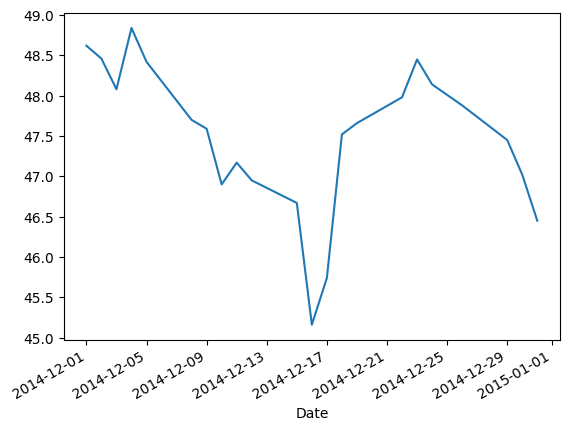

In [19]:
omh.MSFT.plot()

цена акций microsoft и apple на одном графике

<AxesSubplot: xlabel='Date'>

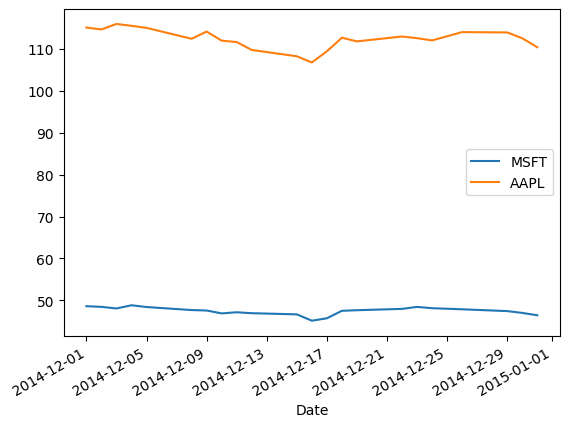

In [20]:
omh.plot()

нормализация:

<AxesSubplot: xlabel='Date'>

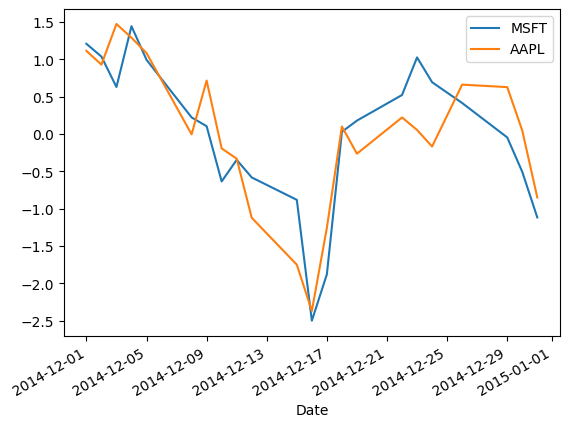

In [27]:
omh_copy = (omh - omh.mean())/omh.std()
omh_copy.plot()

### размер 

увеличиваем размер графика

<AxesSubplot: xlabel='Date'>

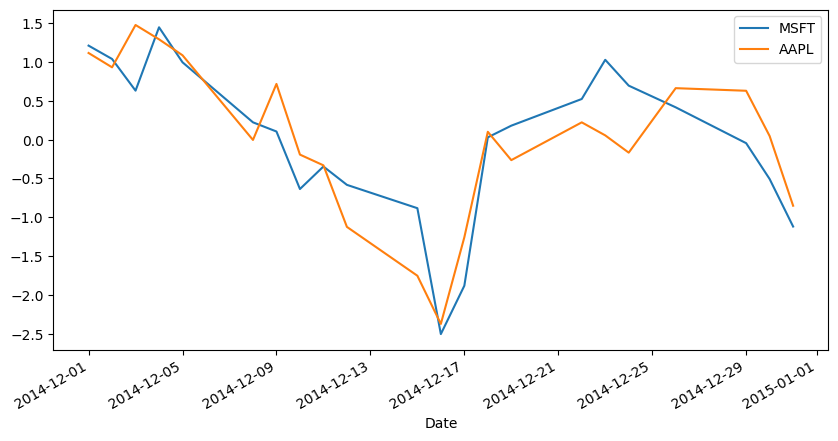

In [26]:
omh_copy.plot(figsize=(10, 5))

### заголовок / подписи

- заголовок задаем с помощью параметра `title` метода `.plot()`
- после вызова метода `.plot()` явно задаем подписи осей `x` и `y`

Text(0, 0.5, 'Цена')

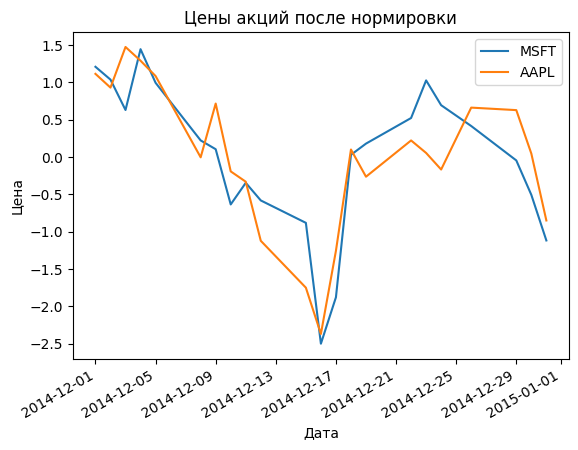

In [32]:
omh_copy.plot(title='Цены акций после нормировки')
plt.xlabel('Дата')
plt.ylabel('Цена')

Можно и короче:

<AxesSubplot: title={'center': 'Цены акций после нормировки'}, xlabel='Дата', ylabel='Цена'>

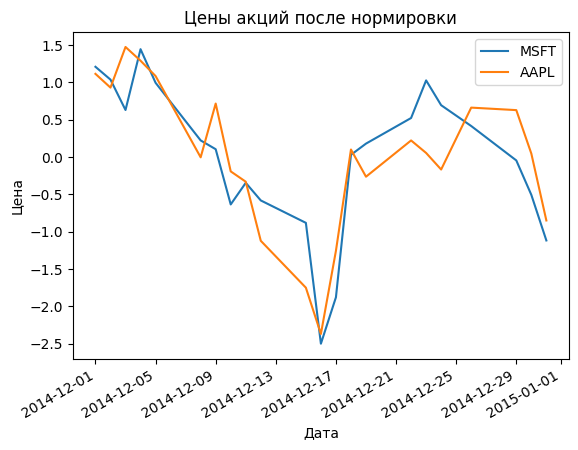

In [33]:
omh_copy.plot(title='Цены акций после нормировки', xlabel='Дата', ylabel='Цена')

### легенда

изменяем элементы легенды, соответствующие именам столбцов датафрейма

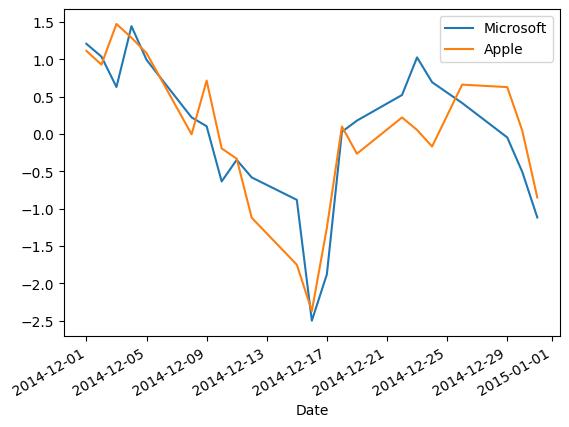

In [34]:
ax = omh_copy.plot()
ax.legend(['Microsoft', 'Apple'])

Или короче:

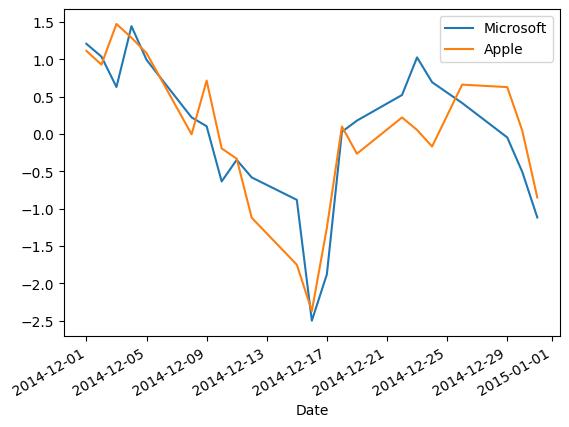

In [36]:
ax = omh_copy.plot().legend(['Microsoft', 'Apple'])

изменяем расположение легенды

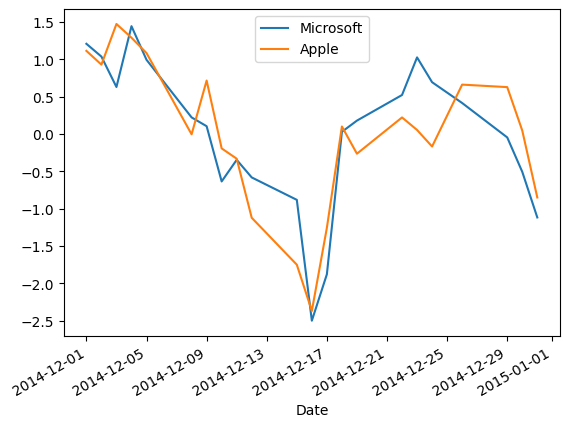

In [39]:
ax = omh_copy.plot().legend(['Microsoft', 'Apple'], loc='upper center')

отключаем легенду с помощью `legend=False`

In [ ]:
omh_copy.plot(legend=False)

### цвет / стиль / толщина / маркер

меняем цвета линий графика  
[односимвольные коды](https://matplotlib.org/2.0.2/api/colors_api.html)  
[шестнадцатеричный RGB-код](https://www.rapidtables.com/web/color/RGB_Color.html)

<AxesSubplot: xlabel='Date'>

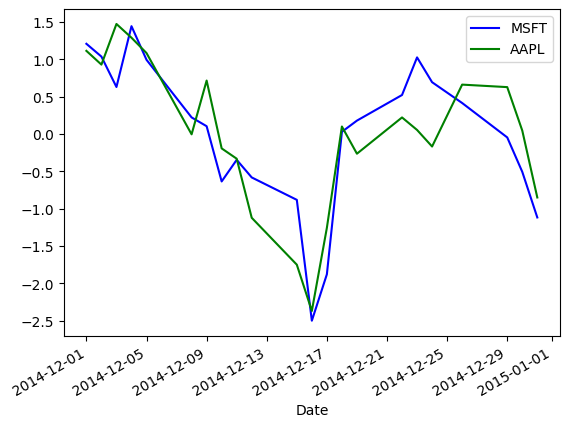

In [40]:
omh_copy.plot(style={'MSFT': '#0000FF', 'AAPL': 'g'}) 

- [различные стили линий](https://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot)  
- увеличиваем толщину линий

<AxesSubplot: xlabel='Date'>

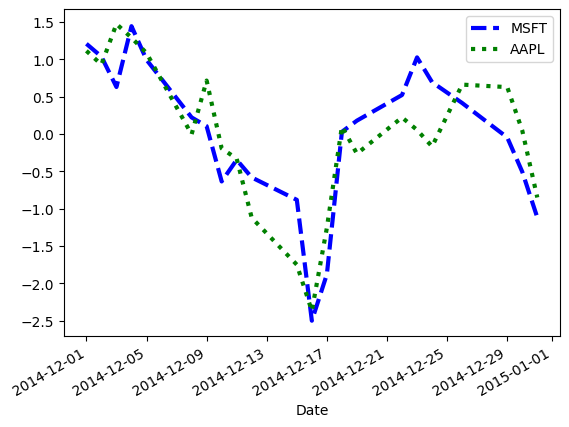

In [42]:
omh_copy.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3)

рисуем заново, добавив [маркеры](https://matplotlib.org/api/markers_api.html) линий

<AxesSubplot: xlabel='Date'>

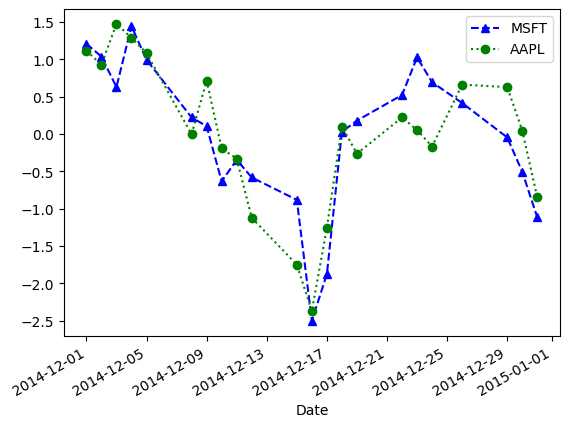

In [43]:
omh_copy.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'})

## Графики

### bar

строим столбчатую диаграмму

<AxesSubplot: >

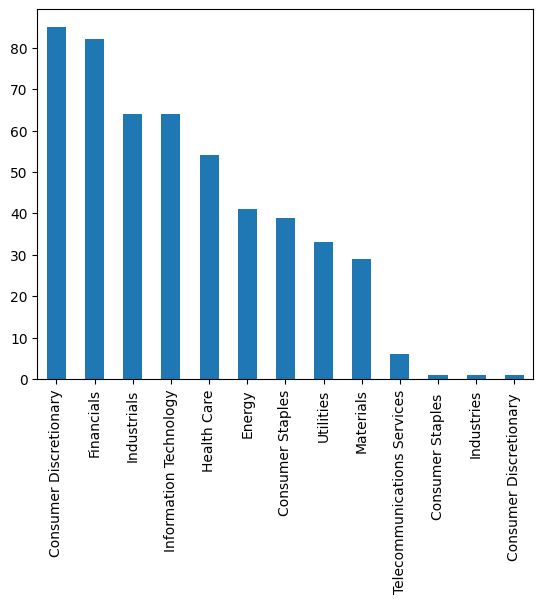

In [65]:
s = sp500.Sector.value_counts()
s.plot(kind='bar')

малочисленные сектора:

In [66]:
small_sectors = s[-4:].index
small_sectors

Index(['Telecommunications Services', 'Consumer Staples ', 'Industries',
       'Consumer Discretionary '],
      dtype='object')

In [50]:
small_sectors = s[-4:].index.values
small_sectors

array(['Telecommunications Services', 'Consumer Staples ', 'Industries',
       'Consumer Discretionary '], dtype=object)

95% квантиль

In [67]:
sp500.quantile(0.95)

C:\Users\commi\AppData\Local\Temp\ipykernel_12272\3423509894.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp500.quantile(0.95)


Price             183.8595
Dividend Yield      4.4370
Book Value         66.2591
Market Cap        134.8750
Name: 0.95, dtype: float64

right way:

In [68]:
sp500.quantile(0.95, numeric_only=True)

Price             183.8595
Dividend Yield      4.4370
Book Value         66.2591
Market Cap        134.8750
Name: 0.95, dtype: float64

создаем копию данных sp500 

In [69]:
ind = (~sp500.Sector.isin(small_sectors)) \
    & (sp500.Price < 184) \
    & (sp500['Book Value'] < 66) \
    & (sp500['Market Cap'] < 134) \
    & (sp500['Dividend Yield'] < 4.5)

`~` - bitwise `not`, inversing boolean mask - `False`s to `True`s and `True`s to `False`s.

In [71]:
sp500_cut = sp500.loc[ind].copy()

In [72]:
sp500_cut.shape

(348, 5)

строим столбчатую диаграмму на основе нескольких серий

<AxesSubplot: xlabel='Sector'>

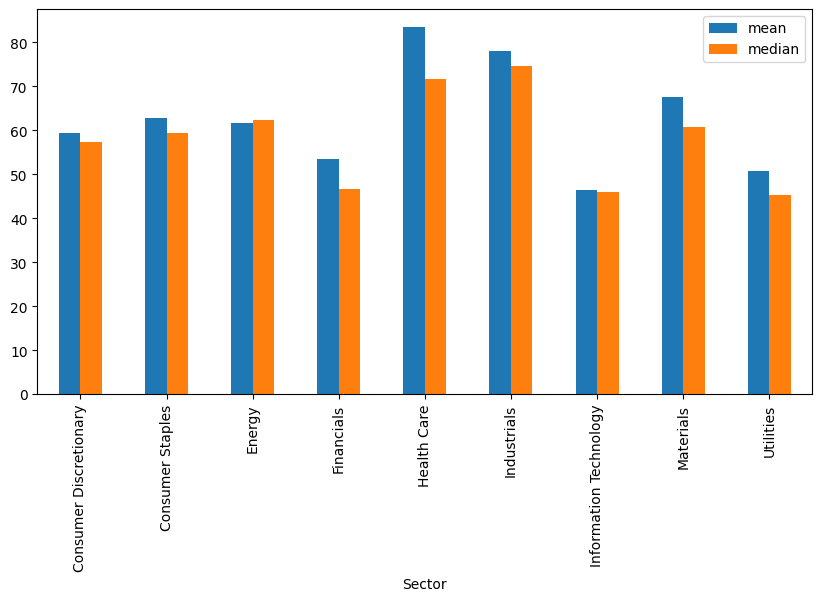

In [73]:
df = sp500_cut.groupby('Sector').Price.agg(['mean', 'median'])
df.plot(kind='bar', figsize=(10, 5))

In [74]:
df

,mean,median
Sector,,
Consumer Discretionary,59.299508,57.320
Consumer Staples,62.835313,59.325
...,...,...
Materials,67.518333,60.705
Utilities,50.854483,45.230


вертикальная состыкованная столбчатая диаграмма

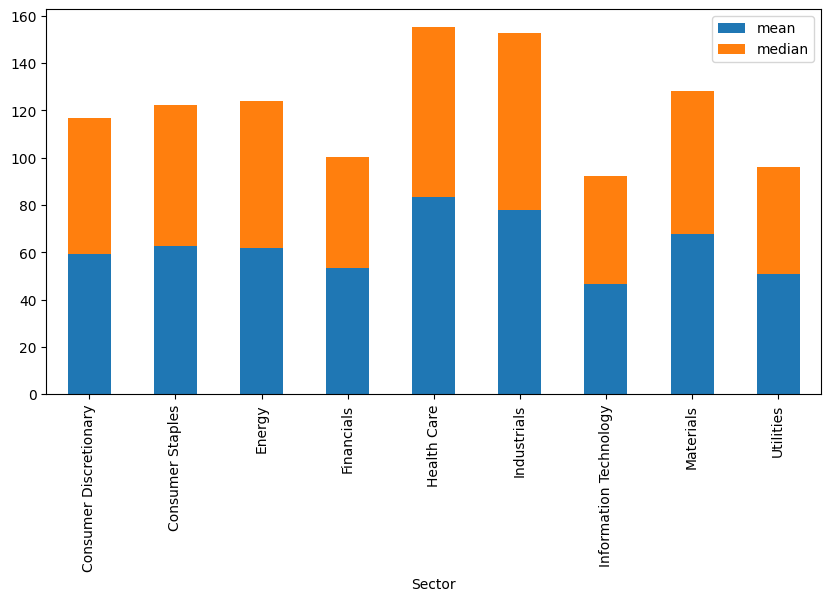

In [75]:
df.plot(kind='bar', stacked=True, figsize=(10, 5));

горизонтальная состыкованная столбиковая диаграмма

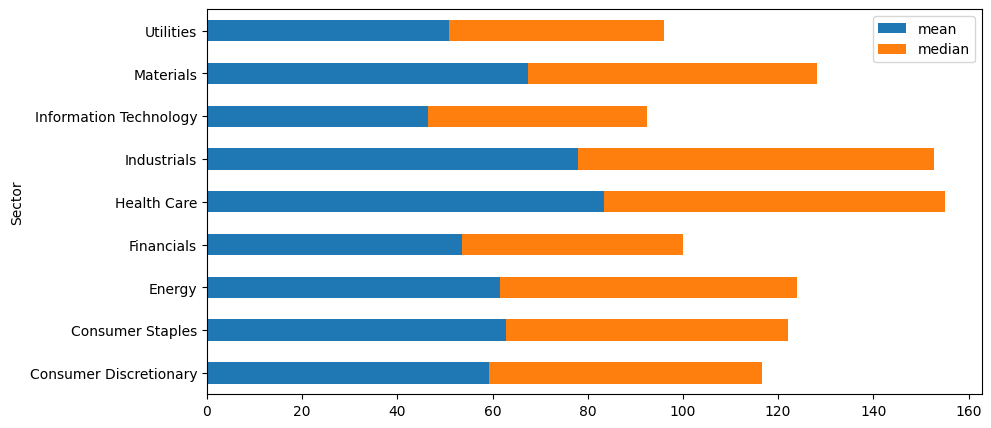

In [76]:
df.plot(kind='barh', stacked=True, figsize=(10, 5));

### hist

строим гистограмму

<AxesSubplot: >

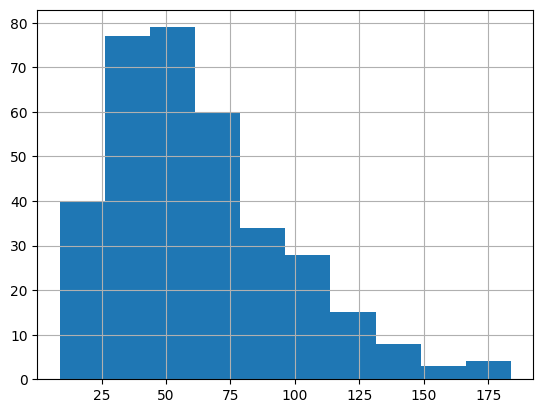

In [77]:
sp500_cut.Price.hist()

снова строим гистограмму, но теперь с большим количеством интервалов (бинов)

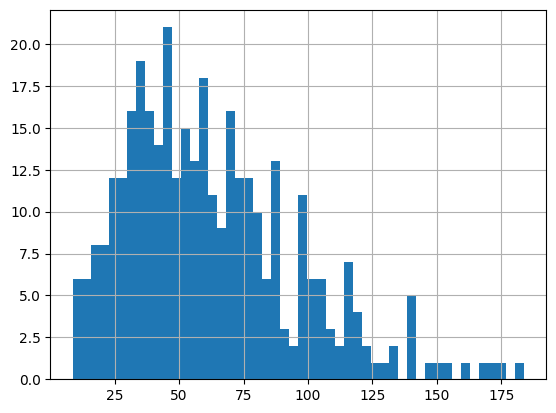

In [90]:
sp500_cut.Price.hist(bins = 50);

поскольку у нас 4 столбца, pandas строит четыре гистограммы

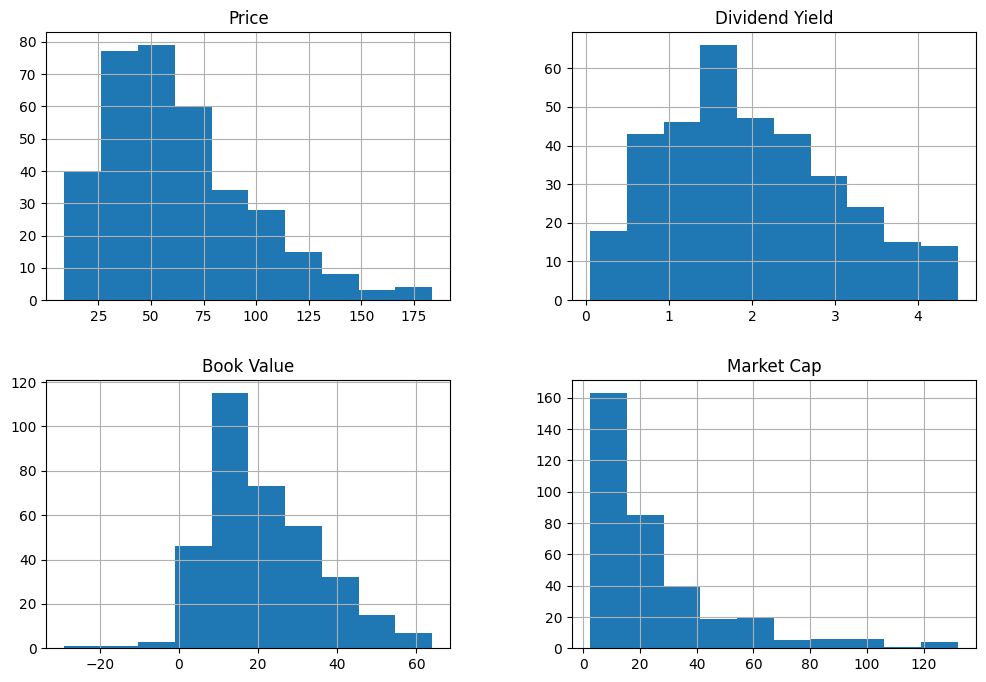

In [93]:
sp500_cut.hist(figsize=(12,8));

напрямую воспользуемся модулем pyplot  для наложения нескольких гистограмм (also check [here](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib))

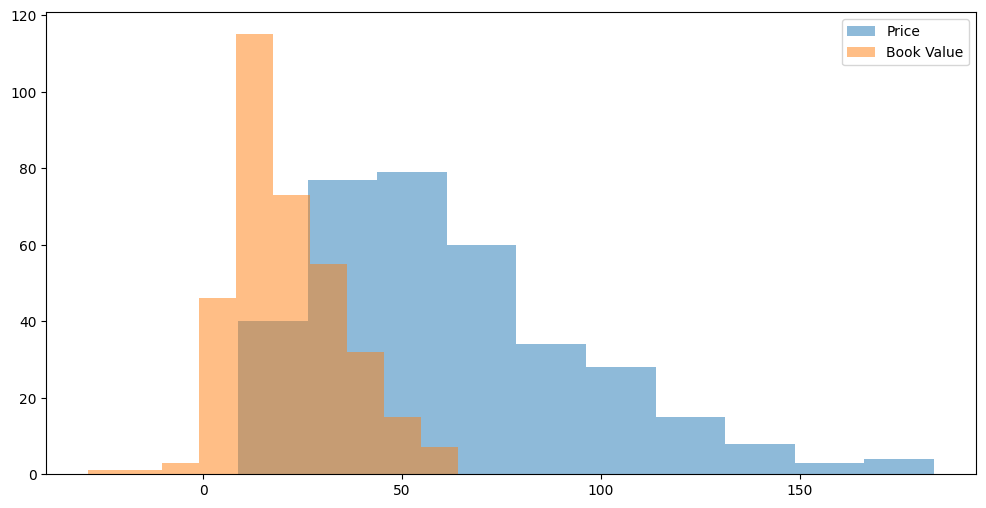

In [82]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_cut.Price, alpha=0.5, label='Price')
plt.hist(sp500_cut['Book Value'], alpha=0.5, label='Book Value')
plt.legend(loc='upper right');

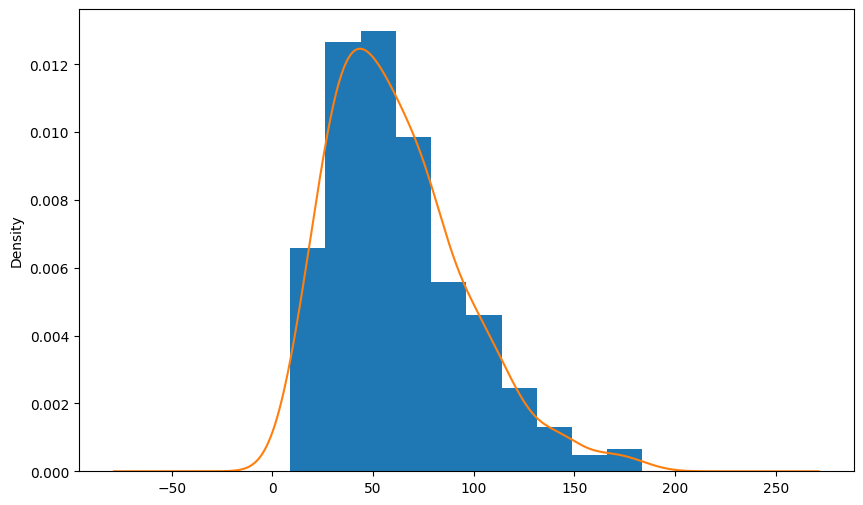

In [99]:
s = sp500_cut.Price
s.hist(density=True)
s.plot(kind='kde', figsize=(10,6));

### box

<img src='..\images\boxplot.png'>

<AxesSubplot: >

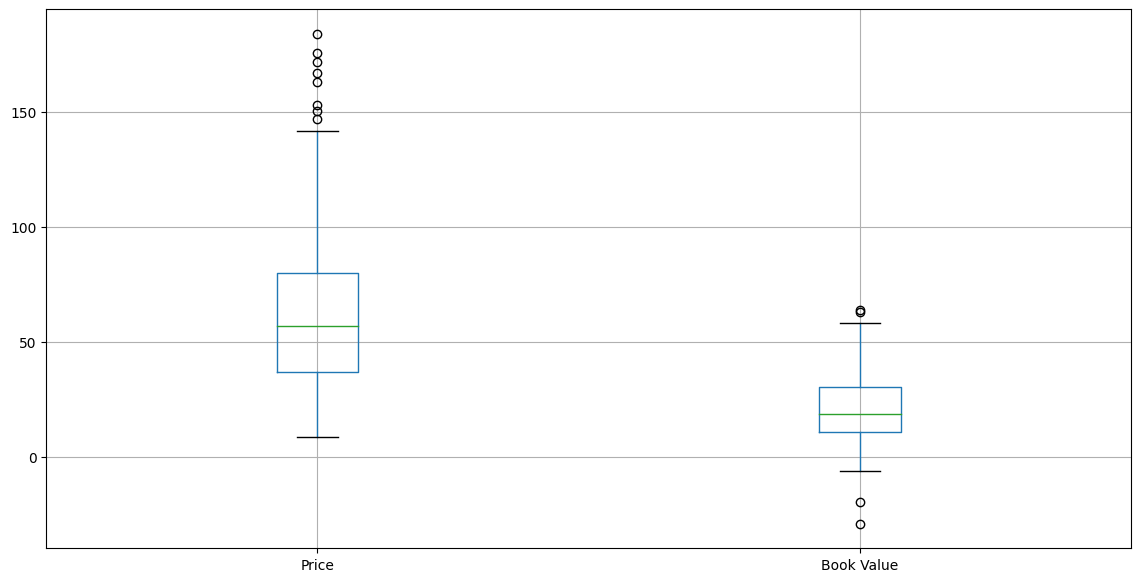

In [83]:
sp500_cut[['Price','Book Value']].boxplot(figsize = (14, 7))

### scatter

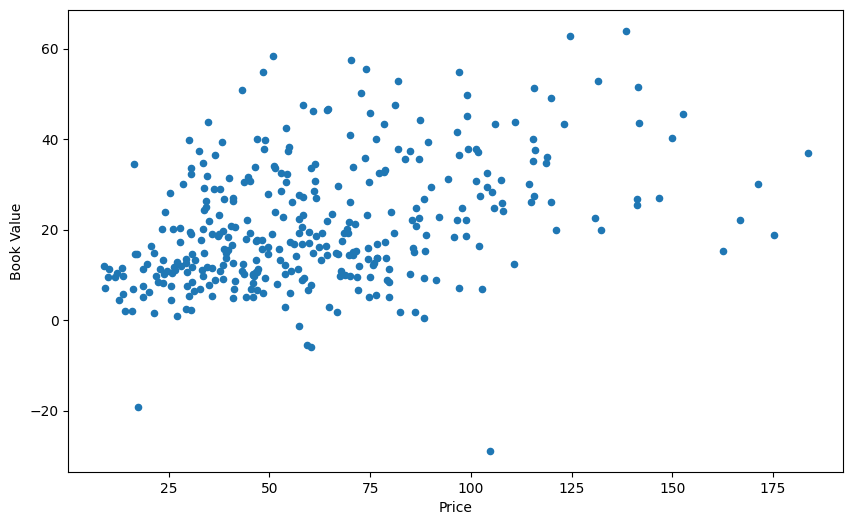

In [85]:
sp500_cut.plot(kind='scatter', x='Price', y='Book Value', figsize=(10, 6));

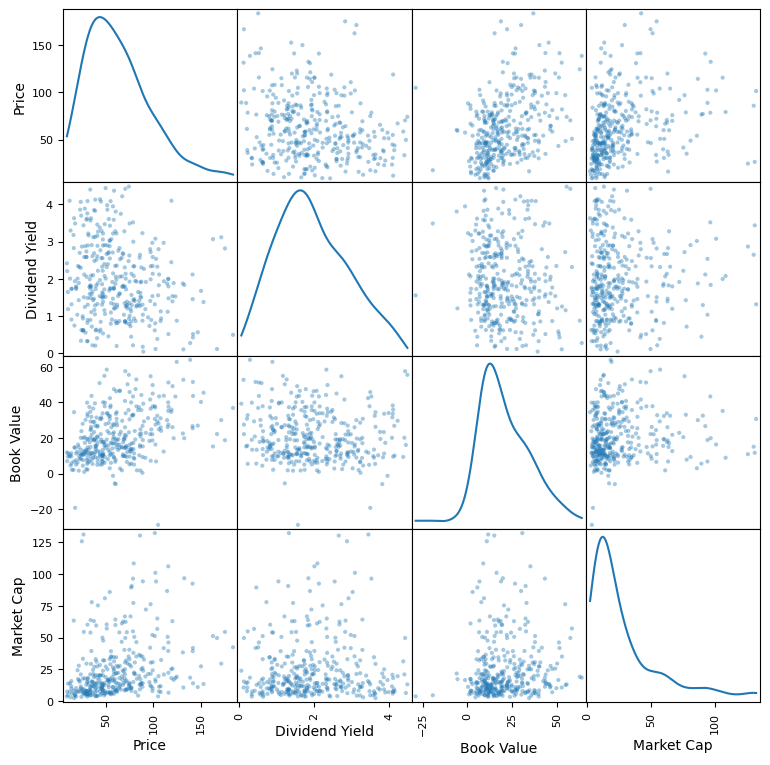

In [88]:
from pandas.plotting import scatter_matrix
scatter_matrix(sp500_cut, alpha=0.4, figsize=(9, 9), diagonal='kde');

### heat map

In [102]:
corr_matrix = sp500_cut.corr()
corr_matrix

C:\Users\commi\AppData\Local\Temp\ipykernel_12272\1840185360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sp500_cut.corr()


,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.198063,0.400478,0.300704
Dividend Yield,-0.198063,1.000000,-0.094121,0.019838
Book Value,0.400478,-0.094121,1.000000,0.069702
Market Cap,0.300704,0.019838,0.069702,1.000000


right way:

In [101]:
corr_matrix = sp500_cut.corr(numeric_only=True)
corr_matrix

,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.198063,0.400478,0.300704
Dividend Yield,-0.198063,1.000000,-0.094121,0.019838
Book Value,0.400478,-0.094121,1.000000,0.069702
Market Cap,0.300704,0.019838,0.069702,1.000000


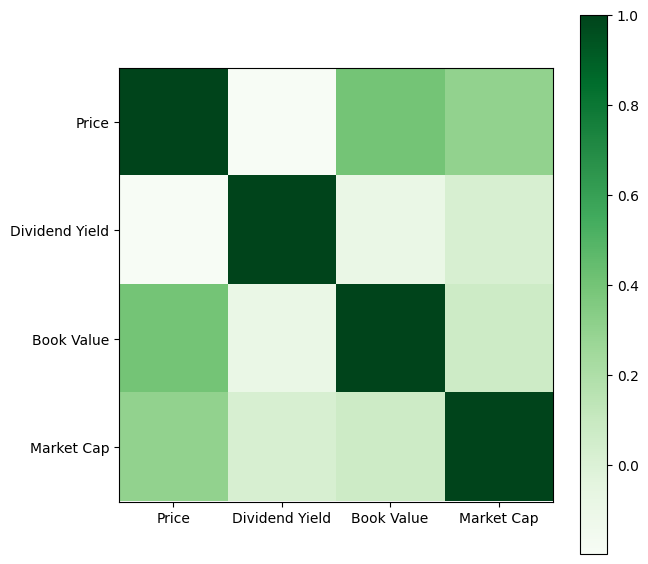

In [104]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);